In [1]:
import math
import tensorflow as tf
import matplotlib.pyplot as plt
import keras
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
from random import sample

In [3]:
# Δημιουργία dataframe διαβάζοντας τo csv που δόθηκε.
# Τοποθετήστε το δικό σας path 

df = pd.read_csv("/nasdaq2007_17.csv", '\t', header=None)

In [4]:
df = df.transpose()
new_header = df.iloc[0] 
df = df[1:]
df.columns = new_header
# df

In [5]:
train_size = int(len(df) * 0.80)
test_size = len(df) - train_size

Time_step = 60

X_train = []
y_train = []

sc = MinMaxScaler(feature_range = (0, 1))

for j in range(0, len(df.columns) ):
    training_set = df.iloc[:train_size,j:j+1].values
    test_set = df.iloc[train_size:,0:1].values

    training_set_scaled = sc.fit_transform(training_set)

    for i in range(Time_step, train_size):
        X_train.append(training_set_scaled[i-Time_step:i, 0])
        y_train.append(training_set_scaled[i, 0])
        
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))



In [6]:
model = Sequential()
layer_size = 50

# Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = layer_size, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = layer_size, return_sequences = True))
model.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = layer_size, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units = layer_size, return_sequences = True))
model.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = layer_size))
model.add(Dropout(0.2))

# Adding the output layer
model.add(Dense(units = 1))

# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model.fit(X_train, y_train, epochs = 50, batch_size = 512)

Epoch 1/50
2006/2006 [==============================] - 61s 26ms/step - loss: 0.0026
Epoch 2/50
2006/2006 [==============================] - 54s 27ms/step - loss: 8.7202e-04
Epoch 3/50
2006/2006 [==============================] - 53s 27ms/step - loss: 6.4924e-04
Epoch 4/50
2006/2006 [==============================] - 53s 27ms/step - loss: 5.9109e-04
Epoch 5/50
2006/2006 [==============================] - 54s 27ms/step - loss: 5.6015e-04
Epoch 6/50
2006/2006 [==============================] - 54s 27ms/step - loss: 5.5378e-04
Epoch 7/50
2006/2006 [==============================] - 54s 27ms/step - loss: 5.4246e-04
Epoch 8/50
2006/2006 [==============================] - 54s 27ms/step - loss: 5.3279e-04
Epoch 9/50
2006/2006 [==============================] - 54s 27ms/step - loss: 5.2851e-04
Epoch 10/50
2006/2006 [==============================] - 54s 27ms/step - loss: 5.2594e-04
Epoch 11/50
2006/2006 [==============================] - 54s 27ms/step - loss: 5.2386e-04
Epoch 12/50
2006/2006 [

In [7]:
path ='myModel'
model.save(path)

INFO:tensorflow:Assets written to: myModel/assets


INFO:tensorflow:Assets written to: myModel/assets


(730, 60, 1)
Time series: 0


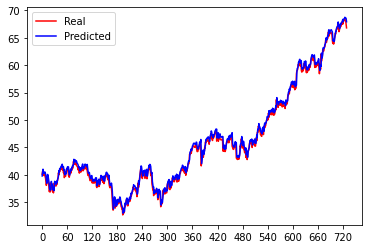

(730, 60, 1)
Time series: 1


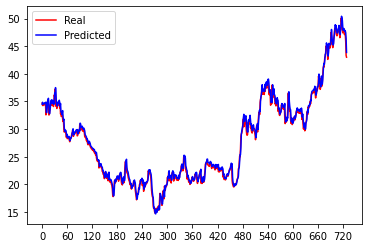

(730, 60, 1)
Time series: 2


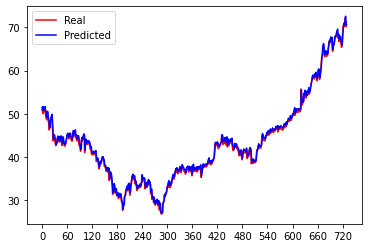

(730, 60, 1)
Time series: 3


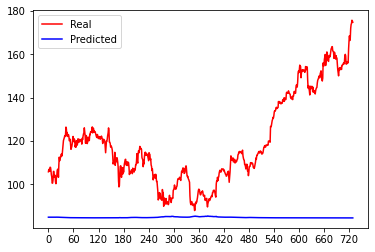

(730, 60, 1)
Time series: 4


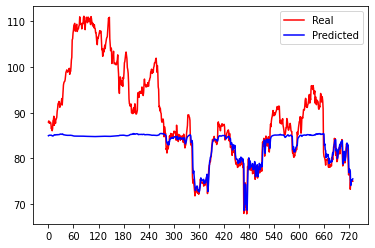

(730, 60, 1)
Time series: 5


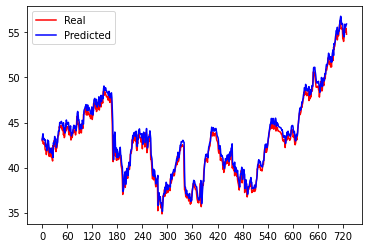

(730, 60, 1)
Time series: 6


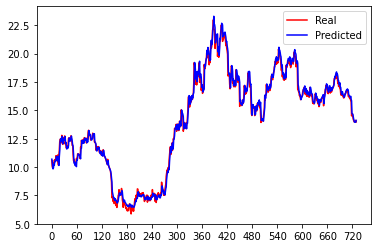

(730, 60, 1)
Time series: 7


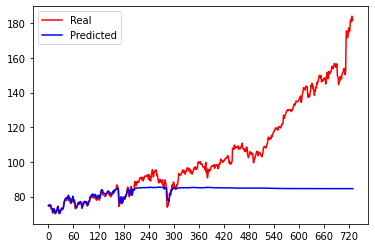

(730, 60, 1)
Time series: 8


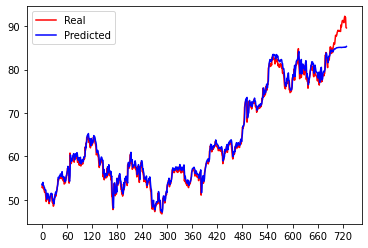

(730, 60, 1)
Time series: 9


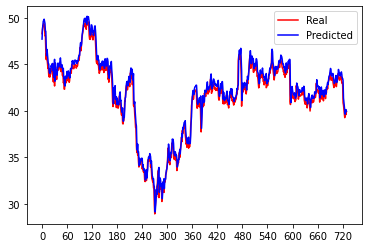

(730, 60, 1)
Time series: 10


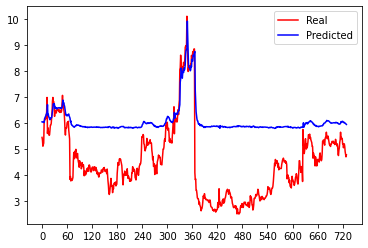

(730, 60, 1)
Time series: 11


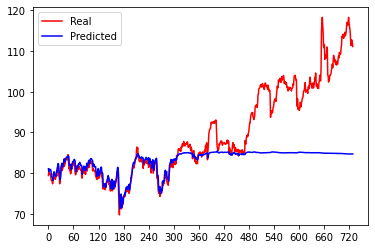

(730, 60, 1)
Time series: 12


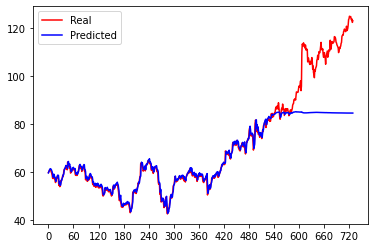

(730, 60, 1)
Time series: 13


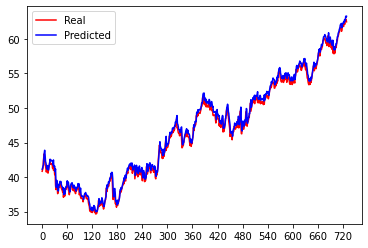

(730, 60, 1)
Time series: 14


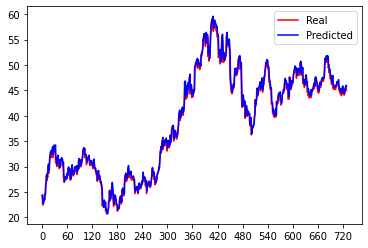

(730, 60, 1)
Time series: 15


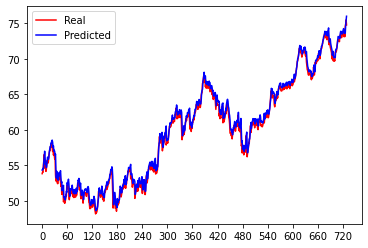

(730, 60, 1)
Time series: 16


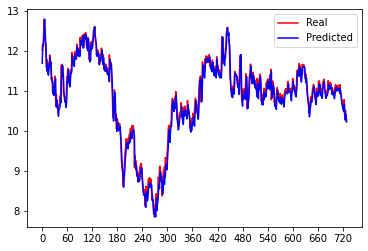

(730, 60, 1)
Time series: 17


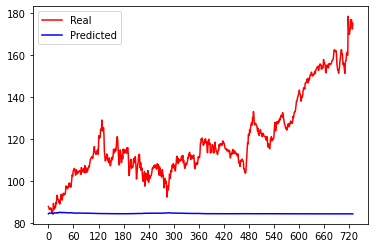

(730, 60, 1)
Time series: 18


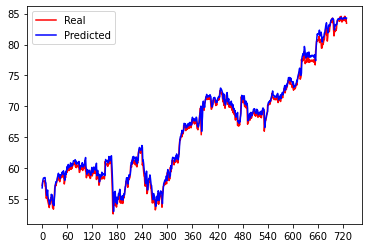

(730, 60, 1)
Time series: 19


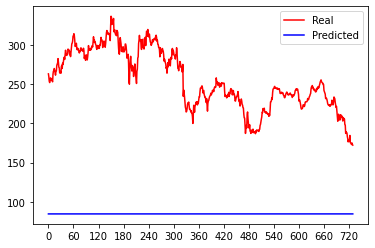

(730, 60, 1)
Time series: 20


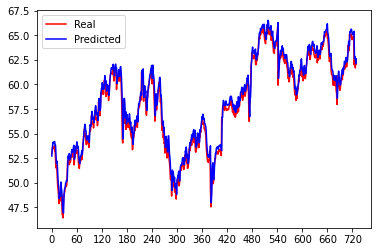

(730, 60, 1)
Time series: 21


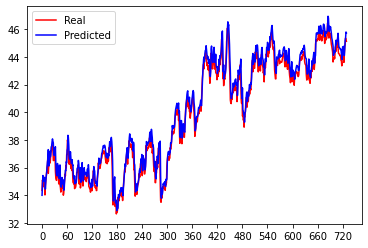

(730, 60, 1)
Time series: 22


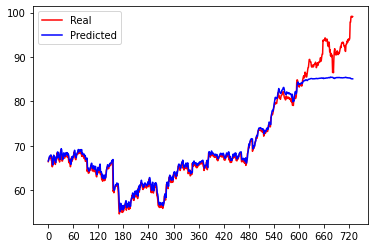

(730, 60, 1)
Time series: 23


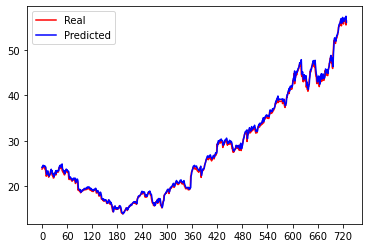

(730, 60, 1)
Time series: 24


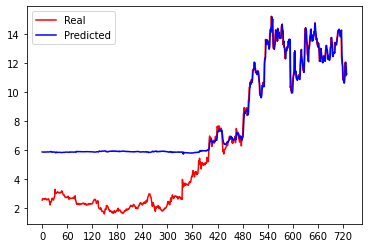

(730, 60, 1)
Time series: 25


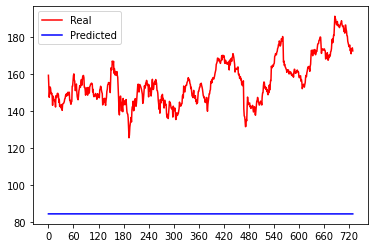

(730, 60, 1)
Time series: 26


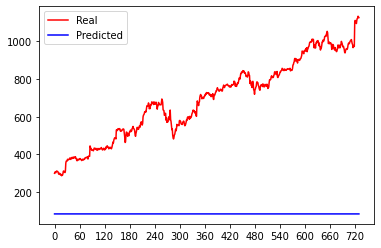

(730, 60, 1)
Time series: 27


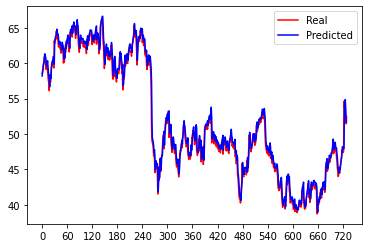

(730, 60, 1)
Time series: 28


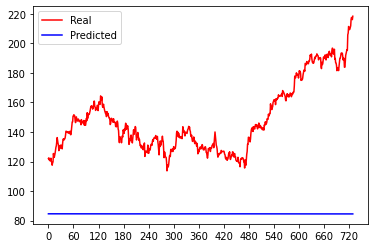

(730, 60, 1)
Time series: 29


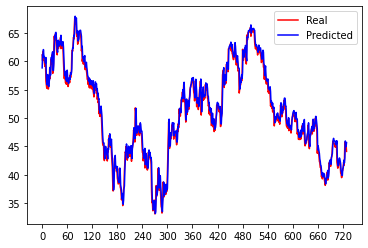

(730, 60, 1)
Time series: 30


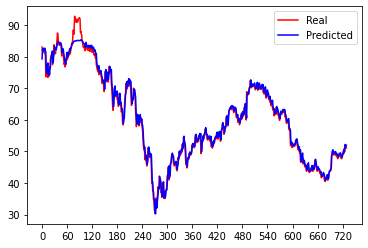

(730, 60, 1)
Time series: 31


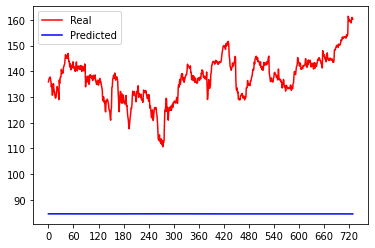

(730, 60, 1)
Time series: 32


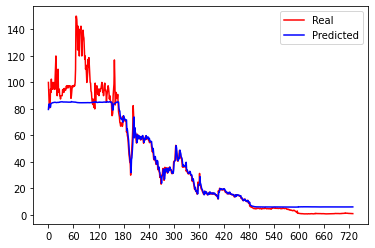

(730, 60, 1)
Time series: 33


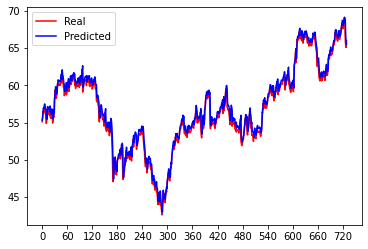

(730, 60, 1)
Time series: 34


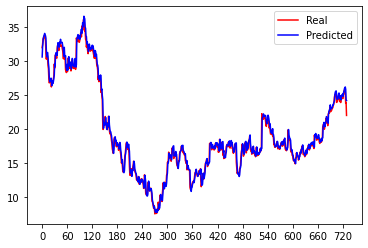

(730, 60, 1)
Time series: 35


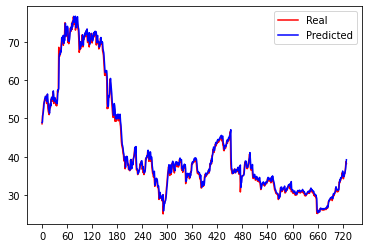

(730, 60, 1)
Time series: 36


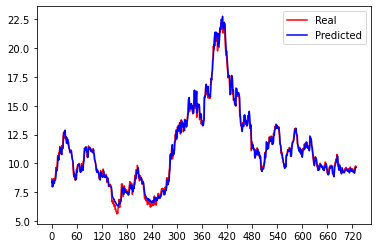

(730, 60, 1)
Time series: 37


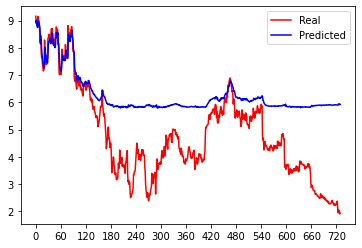

(730, 60, 1)
Time series: 38


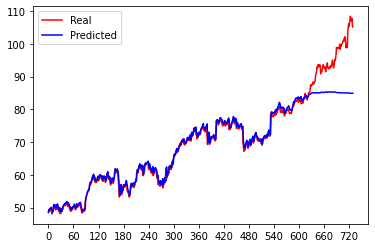

(730, 60, 1)
Time series: 39


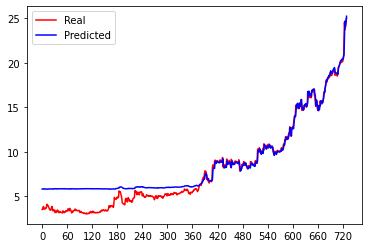

(730, 60, 1)
Time series: 40


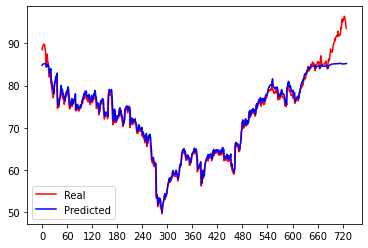

(730, 60, 1)
Time series: 41


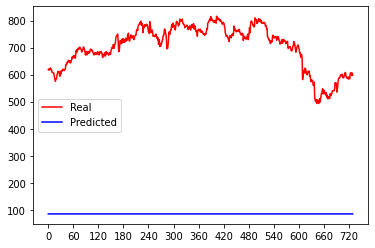

(730, 60, 1)
Time series: 42


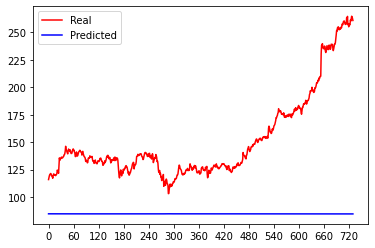

(730, 60, 1)
Time series: 43


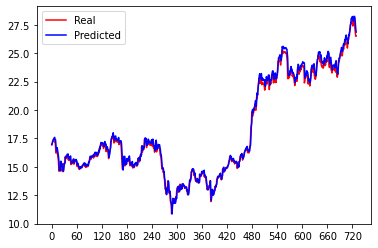

(730, 60, 1)
Time series: 44


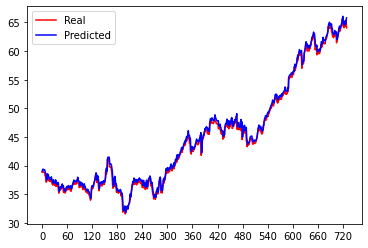

(730, 60, 1)
Time series: 45


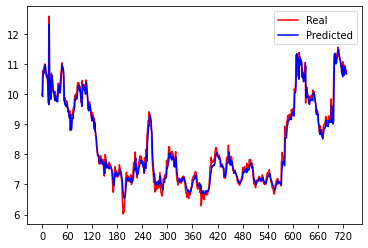

(730, 60, 1)
Time series: 46


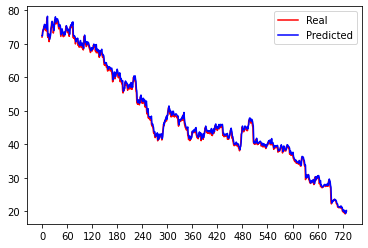

(730, 60, 1)
Time series: 47


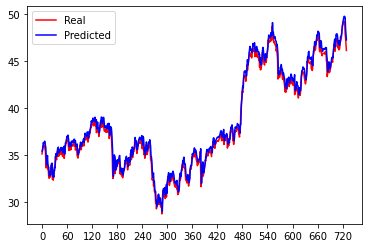

(730, 60, 1)
Time series: 48


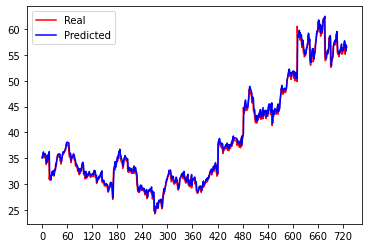

(730, 60, 1)
Time series: 49


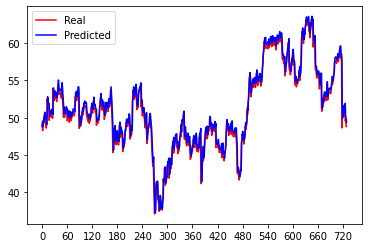

(730, 60, 1)
Time series: 50


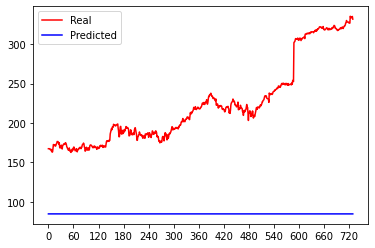

(730, 60, 1)
Time series: 51


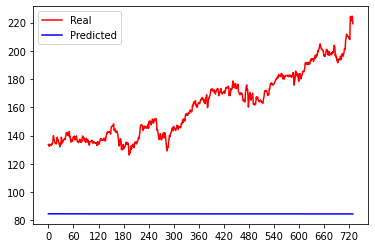

(730, 60, 1)
Time series: 52


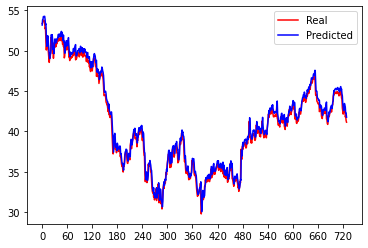

(730, 60, 1)
Time series: 53


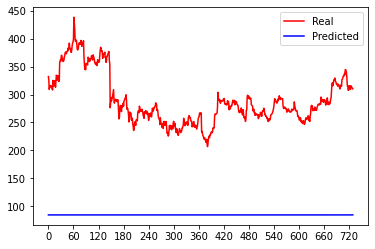

(730, 60, 1)
Time series: 54


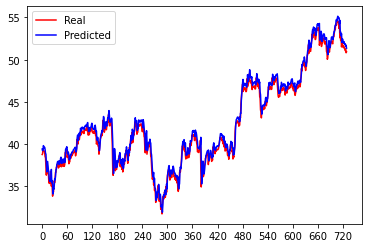

(730, 60, 1)
Time series: 55


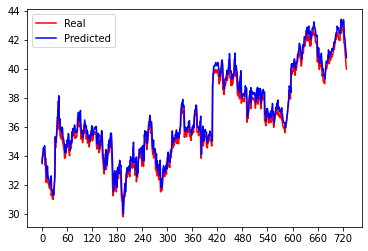

(730, 60, 1)
Time series: 56


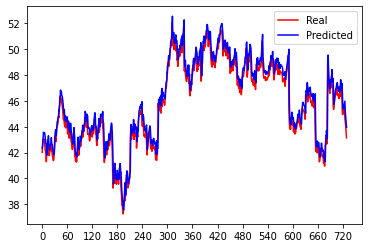

(730, 60, 1)
Time series: 57


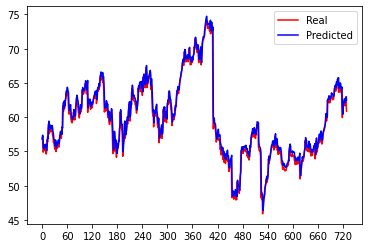

(730, 60, 1)
Time series: 58


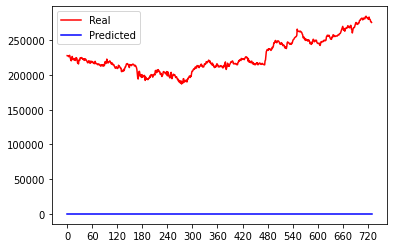

(730, 60, 1)
Time series: 59


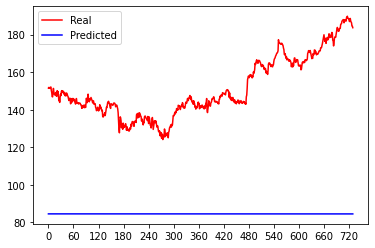

(730, 60, 1)
Time series: 60


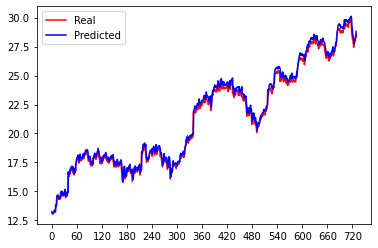

(730, 60, 1)
Time series: 61


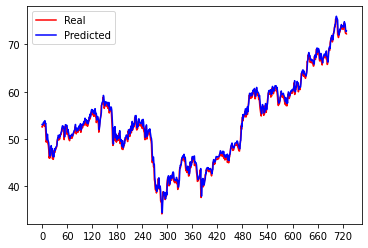

(730, 60, 1)
Time series: 62


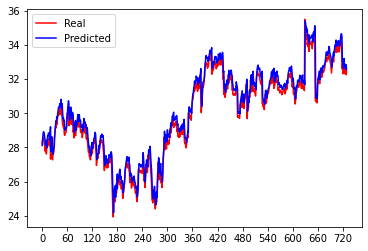

(730, 60, 1)
Time series: 63


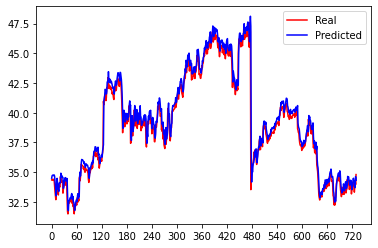

(730, 60, 1)
Time series: 64


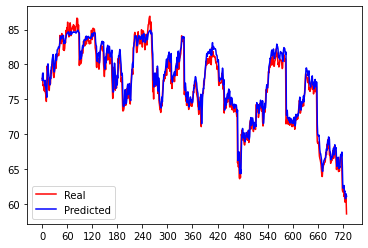

(730, 60, 1)
Time series: 65


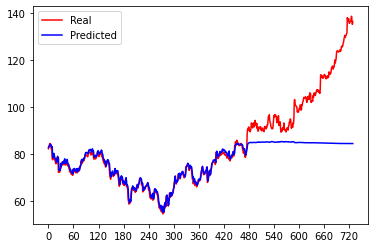

(730, 60, 1)
Time series: 66


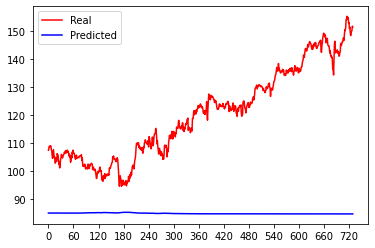

(730, 60, 1)
Time series: 67


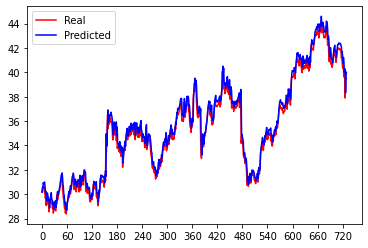

(730, 60, 1)
Time series: 68


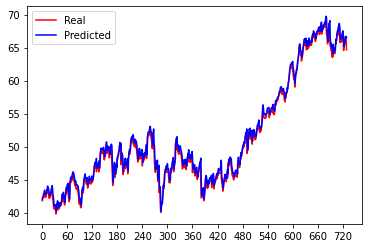

(730, 60, 1)
Time series: 69


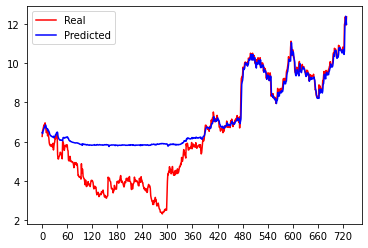

(730, 60, 1)
Time series: 70


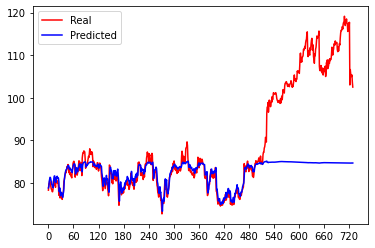

(730, 60, 1)
Time series: 71


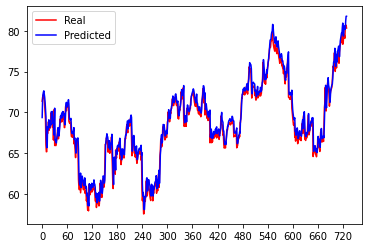

(730, 60, 1)
Time series: 72


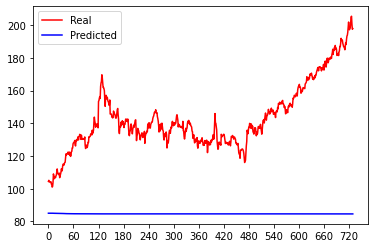

(730, 60, 1)
Time series: 73


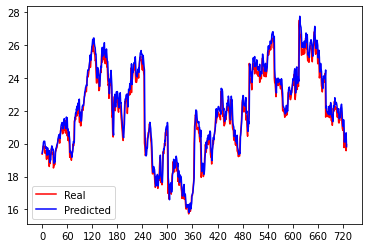

(730, 60, 1)
Time series: 74


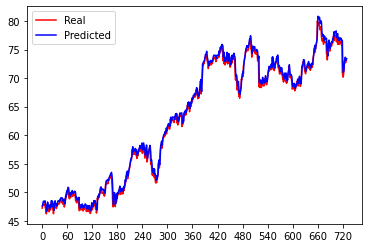

(730, 60, 1)
Time series: 75


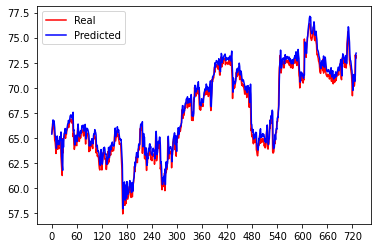

(730, 60, 1)
Time series: 76


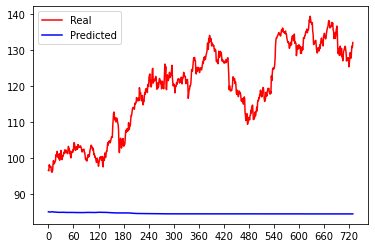

(730, 60, 1)
Time series: 77


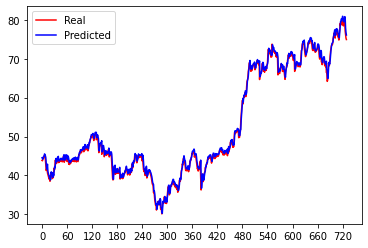

(730, 60, 1)
Time series: 78


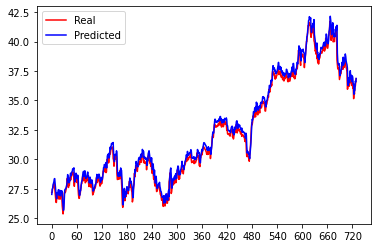

(730, 60, 1)
Time series: 79


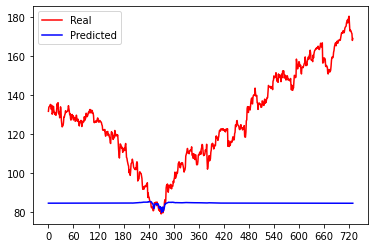

(730, 60, 1)
Time series: 80


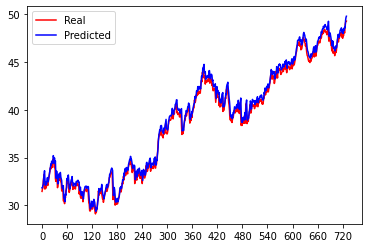

(730, 60, 1)
Time series: 81


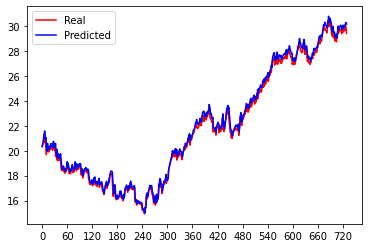

(730, 60, 1)
Time series: 82


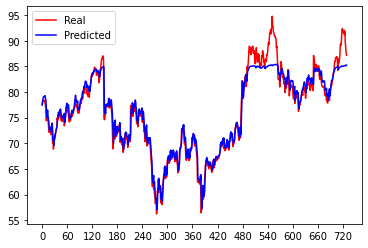

(730, 60, 1)
Time series: 83


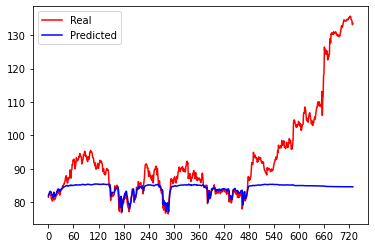

(730, 60, 1)
Time series: 84


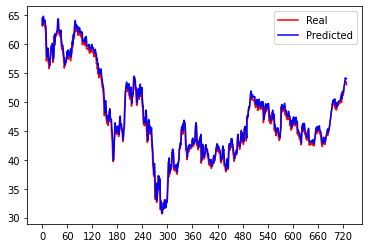

(730, 60, 1)
Time series: 85


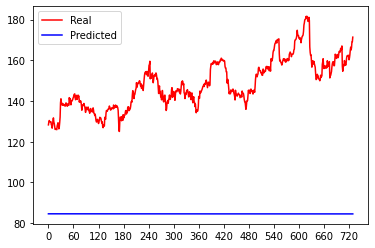

(730, 60, 1)
Time series: 86


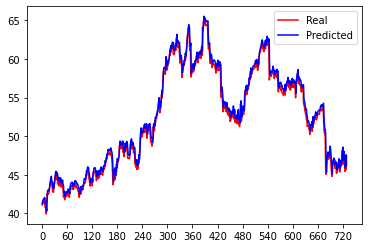

(730, 60, 1)
Time series: 87


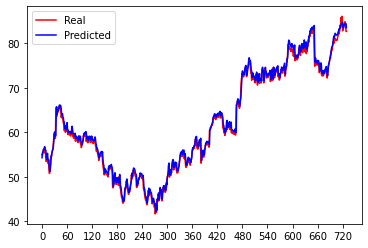

(730, 60, 1)
Time series: 88


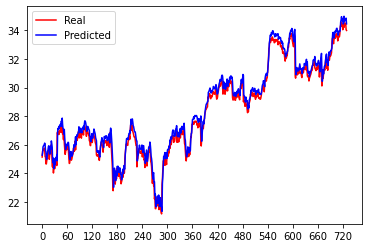

(730, 60, 1)
Time series: 89


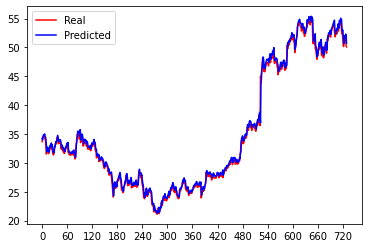

(730, 60, 1)
Time series: 90


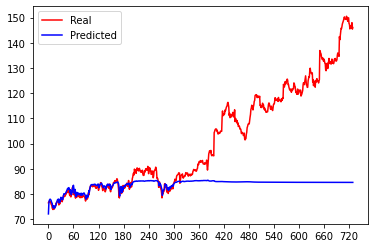

(730, 60, 1)
Time series: 91


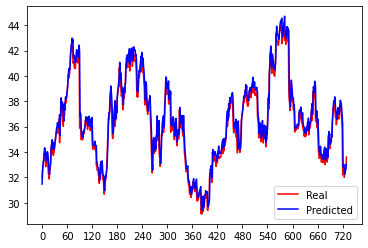

(730, 60, 1)
Time series: 92


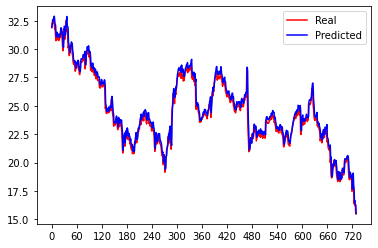

(730, 60, 1)
Time series: 93


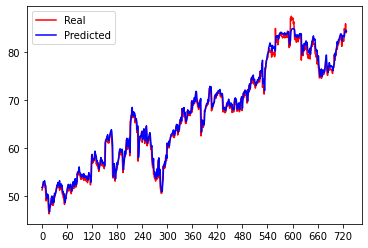

(730, 60, 1)
Time series: 94


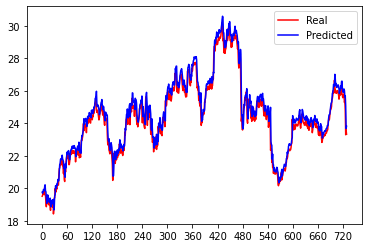

(730, 60, 1)
Time series: 95


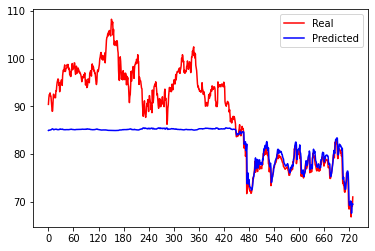

(730, 60, 1)
Time series: 96


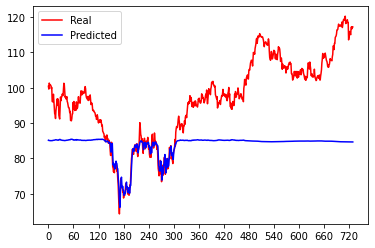

(730, 60, 1)
Time series: 97


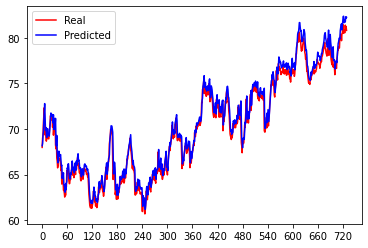

(730, 60, 1)
Time series: 98


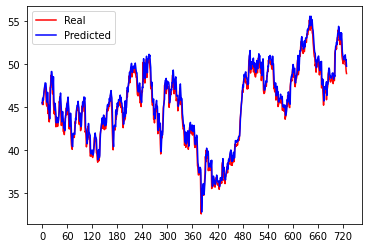

(730, 60, 1)
Time series: 99


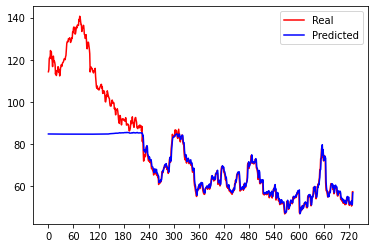

(730, 60, 1)
Time series: 100


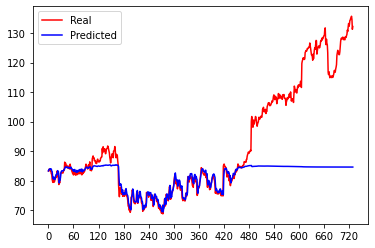

(730, 60, 1)
Time series: 101


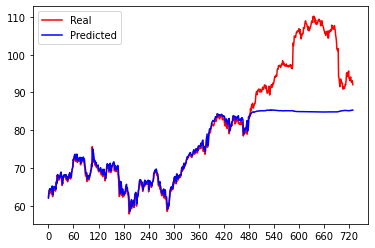

(730, 60, 1)
Time series: 102


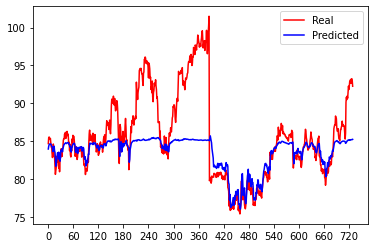

(730, 60, 1)
Time series: 103


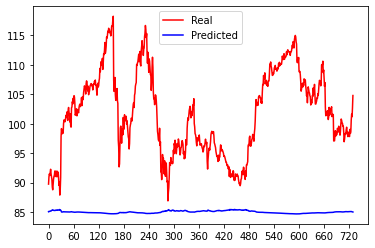

(730, 60, 1)
Time series: 104


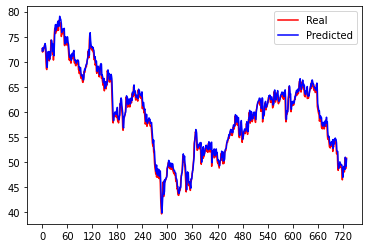

(730, 60, 1)
Time series: 105


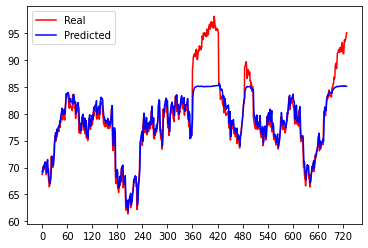

(730, 60, 1)
Time series: 106


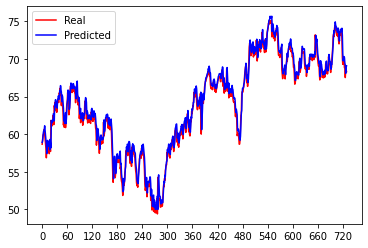

(730, 60, 1)
Time series: 107


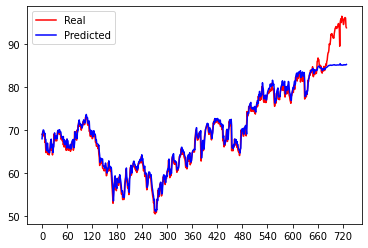

(730, 60, 1)
Time series: 108


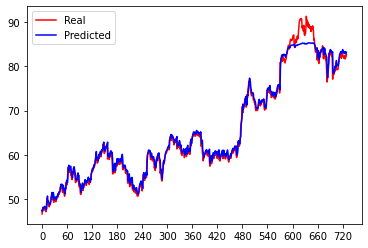

(730, 60, 1)
Time series: 109


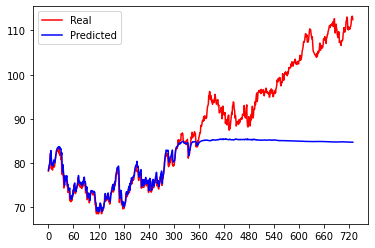

(730, 60, 1)
Time series: 110


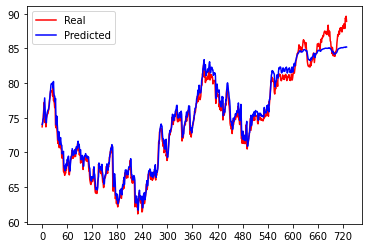

(730, 60, 1)
Time series: 111


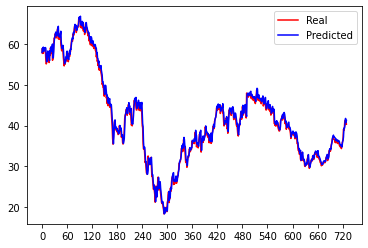

(730, 60, 1)
Time series: 112


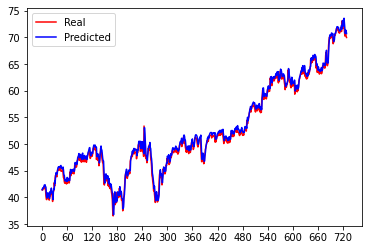

(730, 60, 1)
Time series: 113


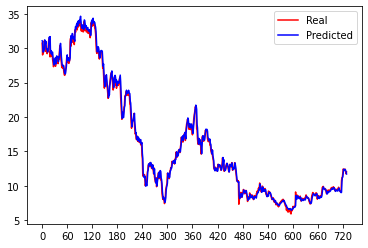

(730, 60, 1)
Time series: 114


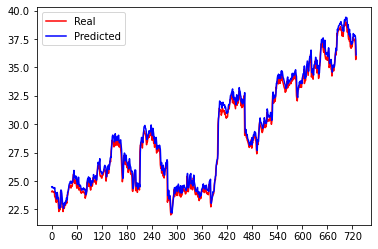

(730, 60, 1)
Time series: 115


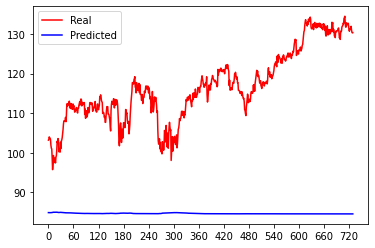

(730, 60, 1)
Time series: 116


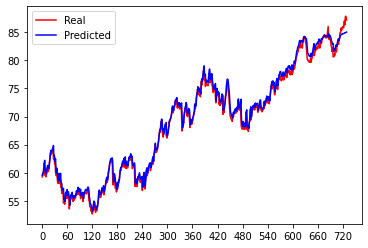

(730, 60, 1)
Time series: 117


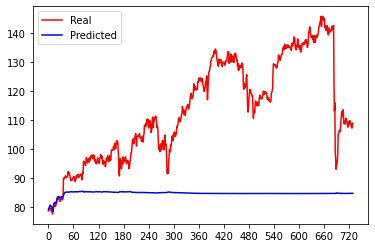

(730, 60, 1)
Time series: 118


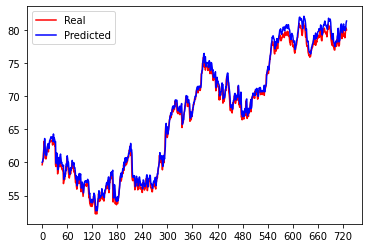

(730, 60, 1)
Time series: 119


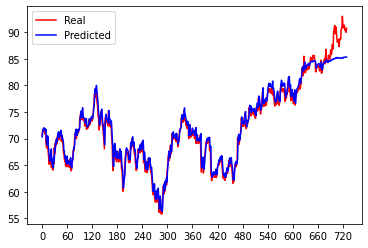

(730, 60, 1)
Time series: 120


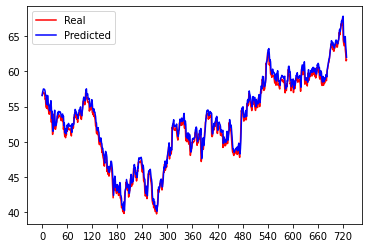

(730, 60, 1)
Time series: 121


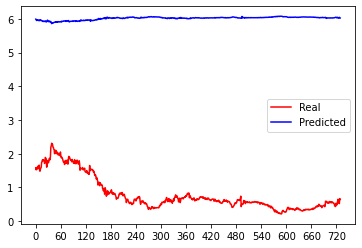

(730, 60, 1)
Time series: 122


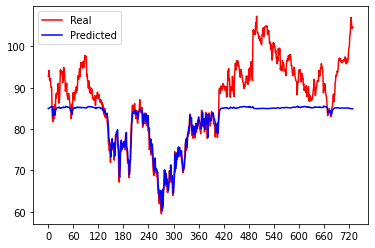

(730, 60, 1)
Time series: 123


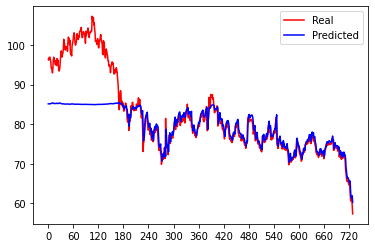

(730, 60, 1)
Time series: 124


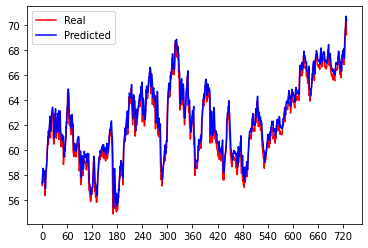

(730, 60, 1)
Time series: 125


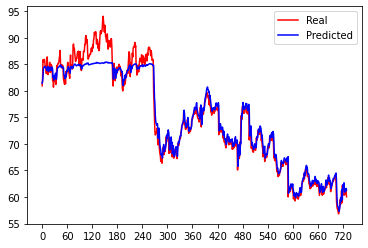

(730, 60, 1)
Time series: 126


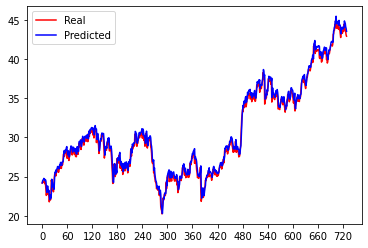

(730, 60, 1)
Time series: 127


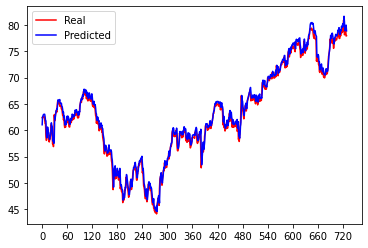

(730, 60, 1)
Time series: 128


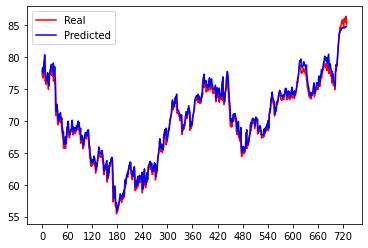

(730, 60, 1)
Time series: 129


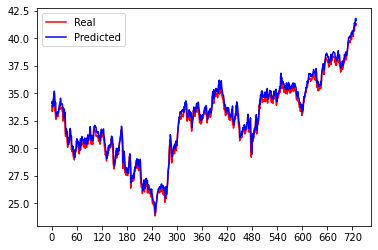

(730, 60, 1)
Time series: 130


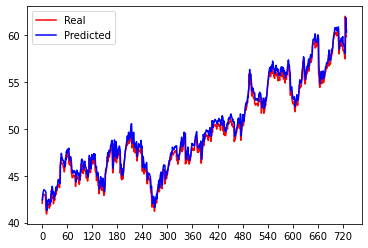

(730, 60, 1)
Time series: 131


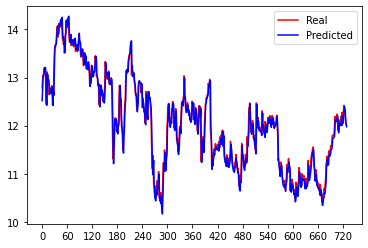

(730, 60, 1)
Time series: 132


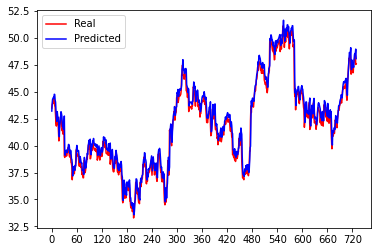

(730, 60, 1)
Time series: 133


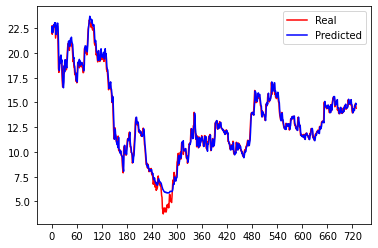

(730, 60, 1)
Time series: 134


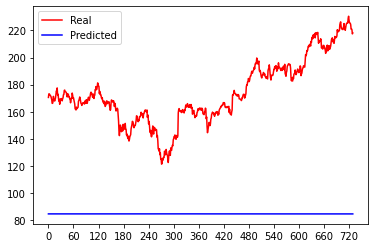

(730, 60, 1)
Time series: 135


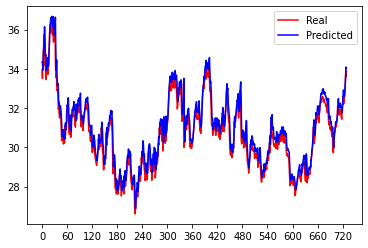

(730, 60, 1)
Time series: 136


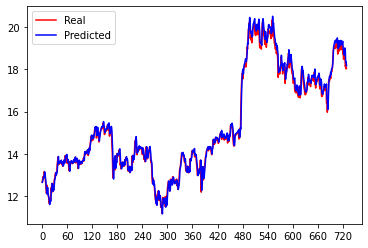

(730, 60, 1)
Time series: 137


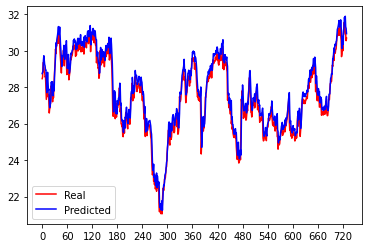

(730, 60, 1)
Time series: 138


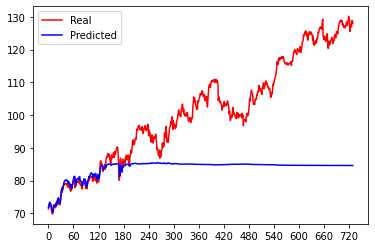

(730, 60, 1)
Time series: 139


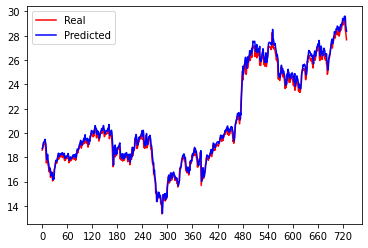

(730, 60, 1)
Time series: 140


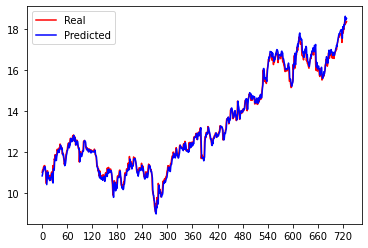

(730, 60, 1)
Time series: 141


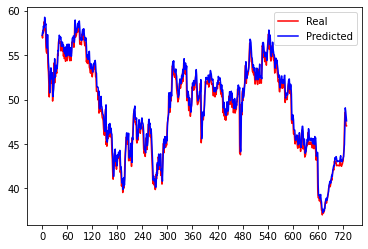

(730, 60, 1)
Time series: 142


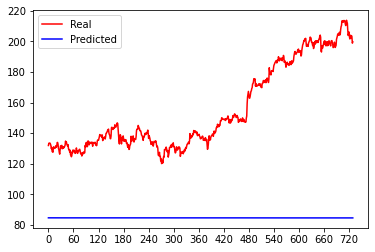

(730, 60, 1)
Time series: 143


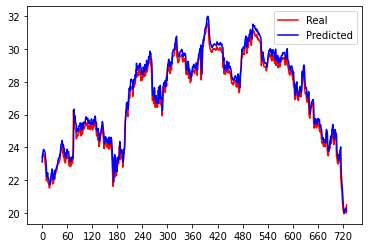

(730, 60, 1)
Time series: 144


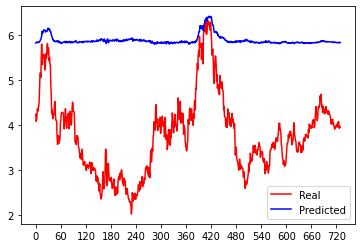

(730, 60, 1)
Time series: 145


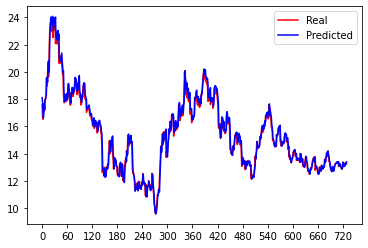

(730, 60, 1)
Time series: 146


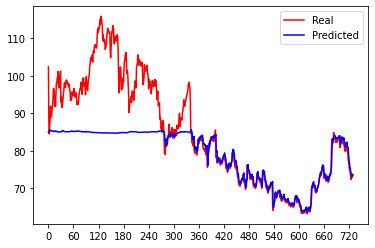

(730, 60, 1)
Time series: 147


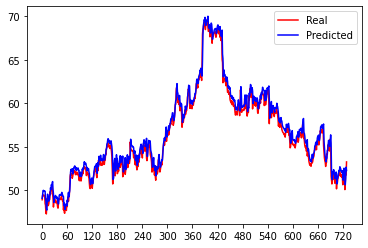

(730, 60, 1)
Time series: 148


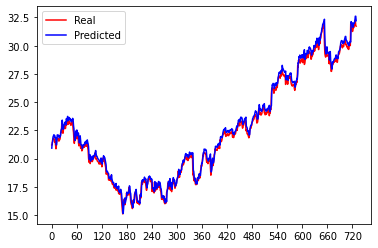

(730, 60, 1)
Time series: 149


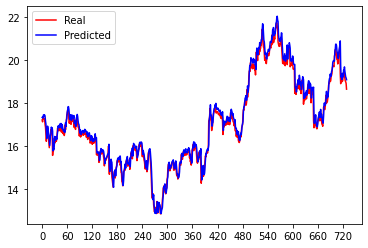

(730, 60, 1)
Time series: 150


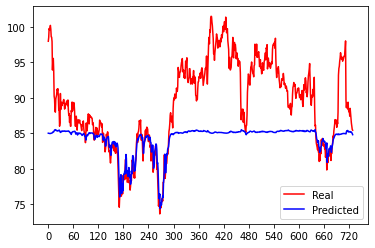

(730, 60, 1)
Time series: 151


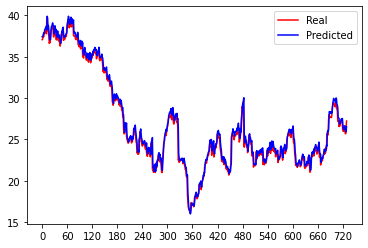

(730, 60, 1)
Time series: 152


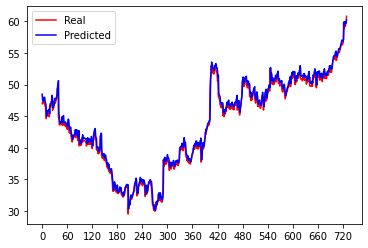

(730, 60, 1)
Time series: 153


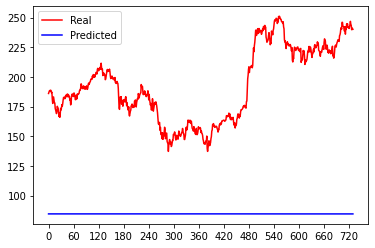

(730, 60, 1)
Time series: 154


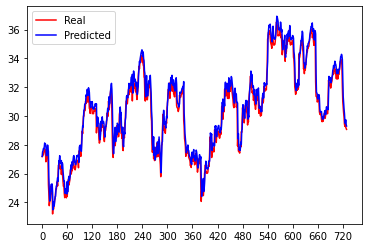

(730, 60, 1)
Time series: 155


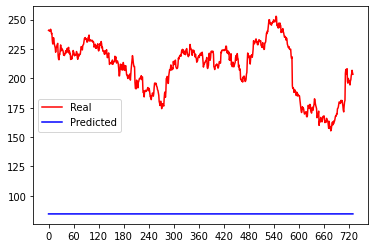

(730, 60, 1)
Time series: 156


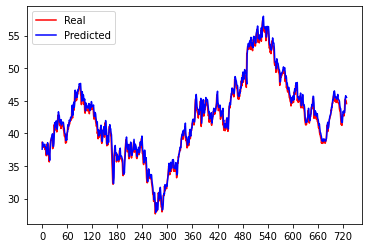

(730, 60, 1)
Time series: 157


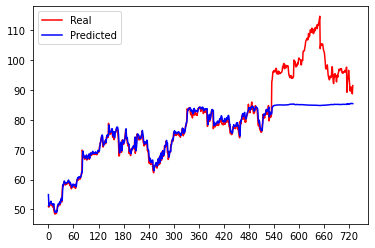

(730, 60, 1)
Time series: 158


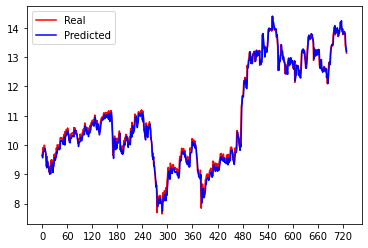

(730, 60, 1)
Time series: 159


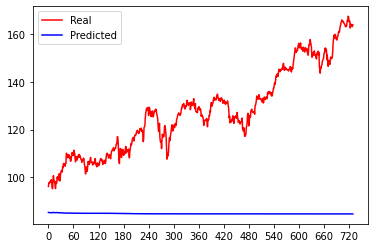

(730, 60, 1)
Time series: 160


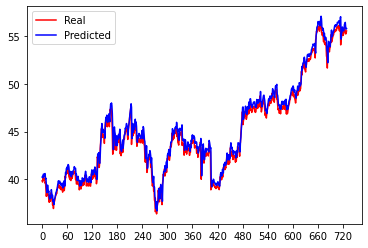

(730, 60, 1)
Time series: 161


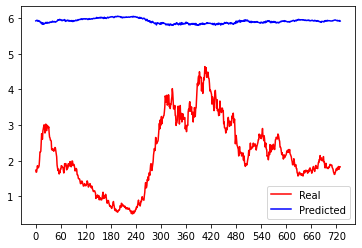

(730, 60, 1)
Time series: 162


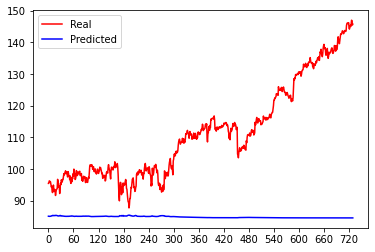

(730, 60, 1)
Time series: 163


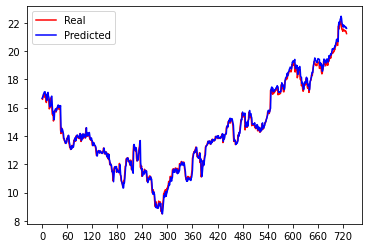

(730, 60, 1)
Time series: 164


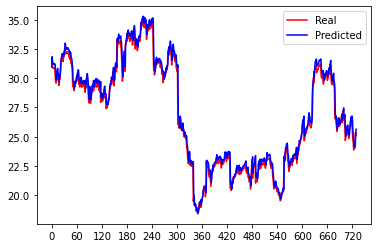

(730, 60, 1)
Time series: 165


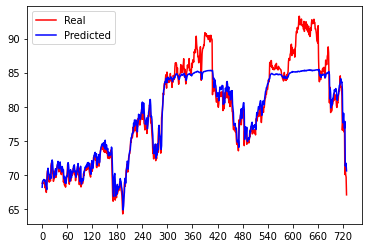

(730, 60, 1)
Time series: 166


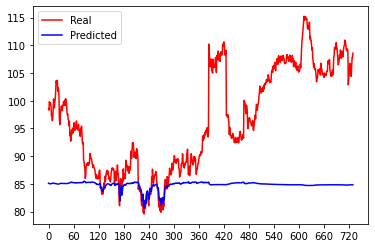

(730, 60, 1)
Time series: 167


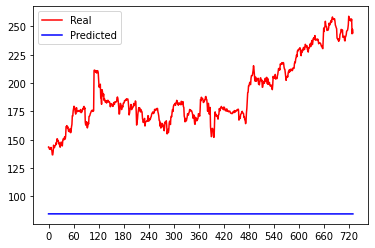

(730, 60, 1)
Time series: 168


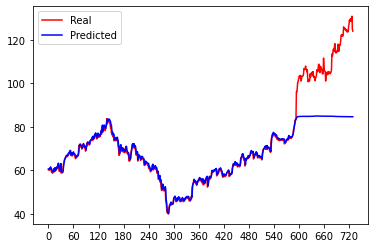

(730, 60, 1)
Time series: 169


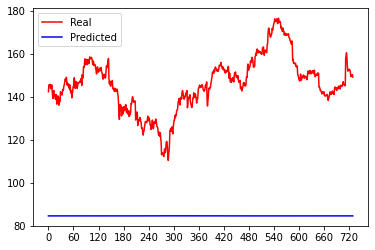

(730, 60, 1)
Time series: 170


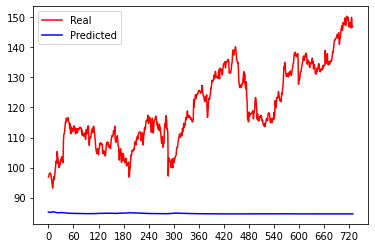

(730, 60, 1)
Time series: 171


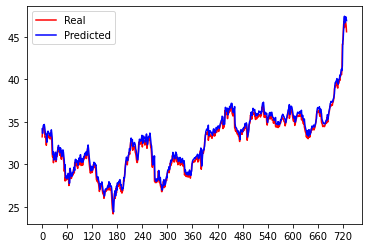

(730, 60, 1)
Time series: 172


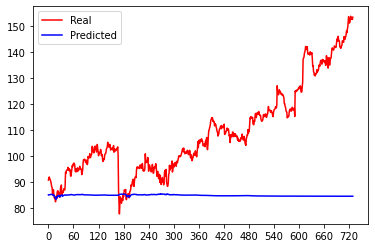

(730, 60, 1)
Time series: 173


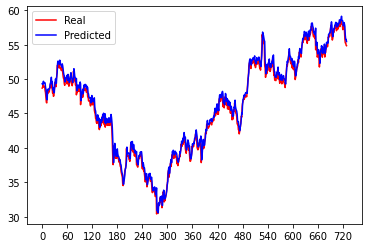

(730, 60, 1)
Time series: 174


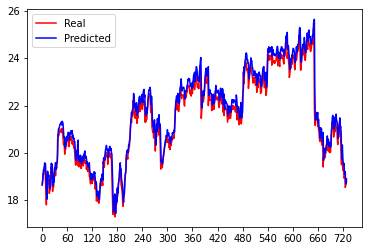

(730, 60, 1)
Time series: 175


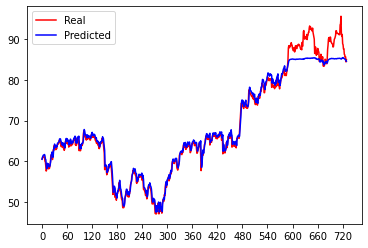

(730, 60, 1)
Time series: 176


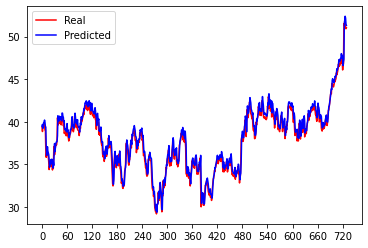

(730, 60, 1)
Time series: 177


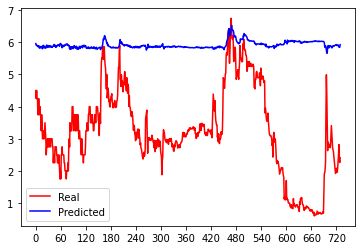

(730, 60, 1)
Time series: 178


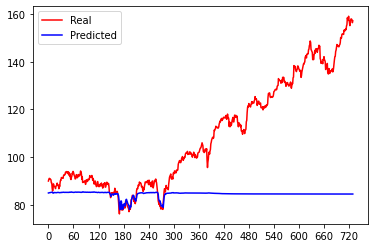

(730, 60, 1)
Time series: 179


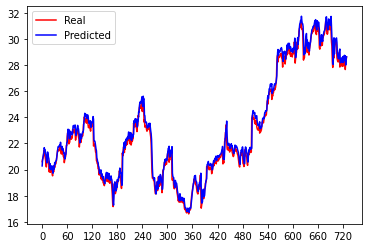

(730, 60, 1)
Time series: 180


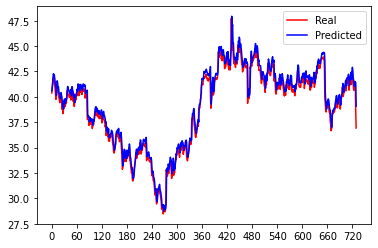

(730, 60, 1)
Time series: 181


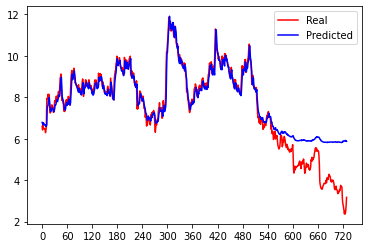

(730, 60, 1)
Time series: 182


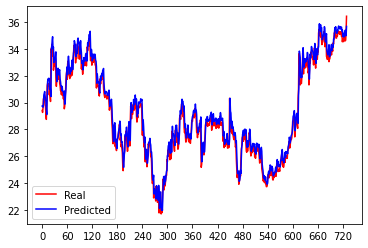

(730, 60, 1)
Time series: 183


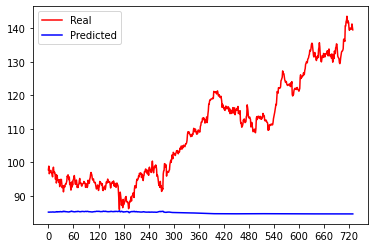

(730, 60, 1)
Time series: 184


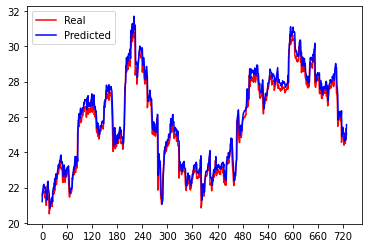

(730, 60, 1)
Time series: 185


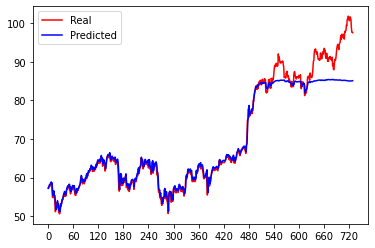

(730, 60, 1)
Time series: 186


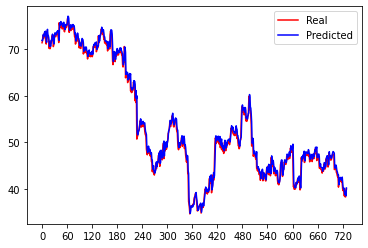

(730, 60, 1)
Time series: 187


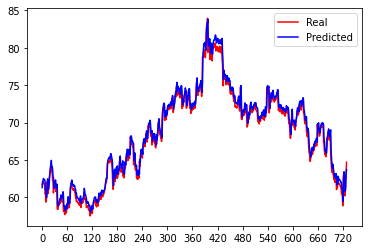

(730, 60, 1)
Time series: 188


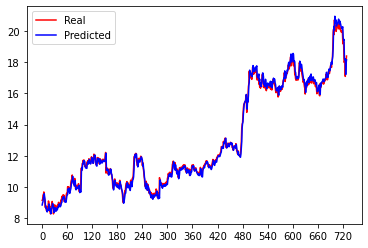

(730, 60, 1)
Time series: 189


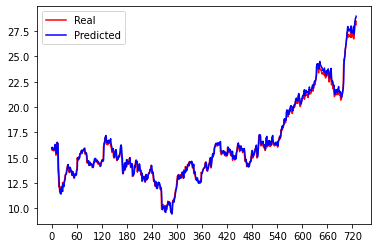

(730, 60, 1)
Time series: 190


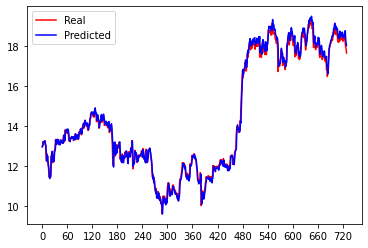

(730, 60, 1)
Time series: 191


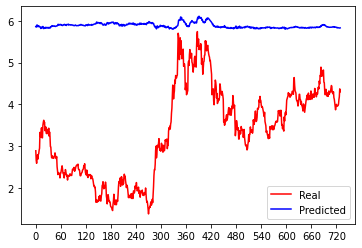

(730, 60, 1)
Time series: 192


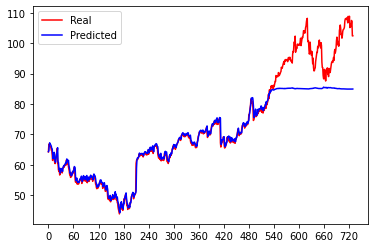

(730, 60, 1)
Time series: 193


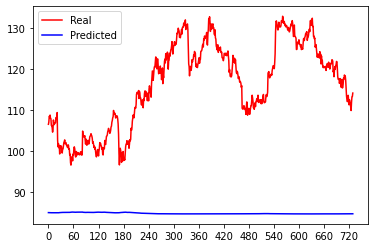

(730, 60, 1)
Time series: 194


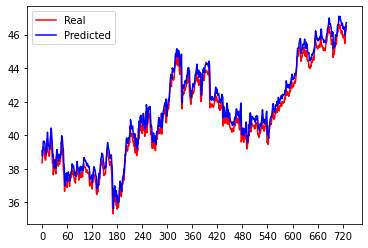

(730, 60, 1)
Time series: 195


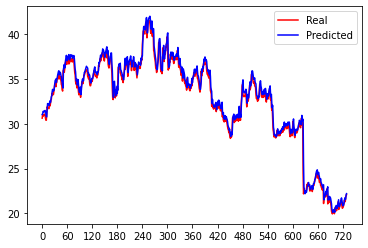

(730, 60, 1)
Time series: 196


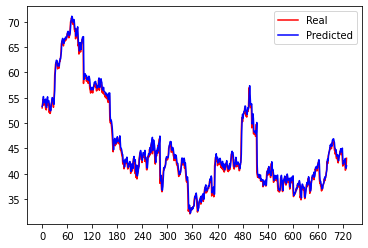

(730, 60, 1)
Time series: 197


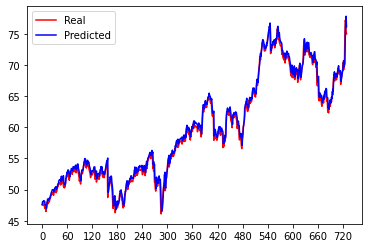

(730, 60, 1)
Time series: 198


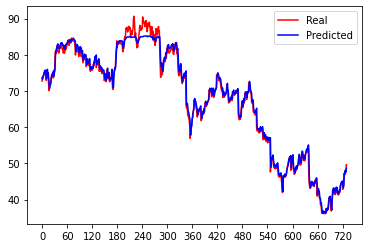

(730, 60, 1)
Time series: 199


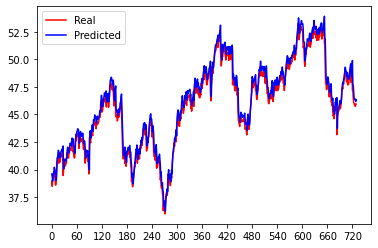

(730, 60, 1)
Time series: 200


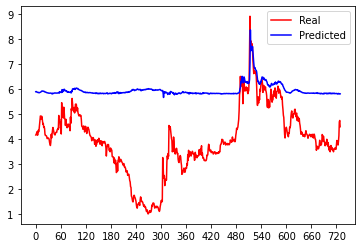

(730, 60, 1)
Time series: 201


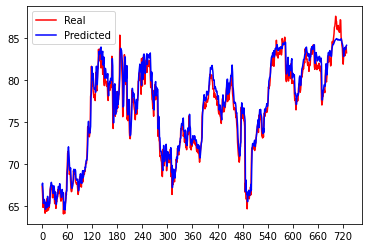

(730, 60, 1)
Time series: 202


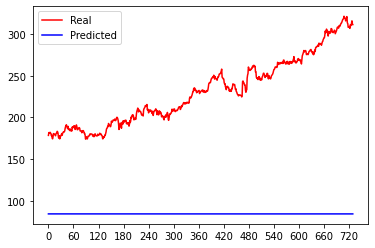

(730, 60, 1)
Time series: 203


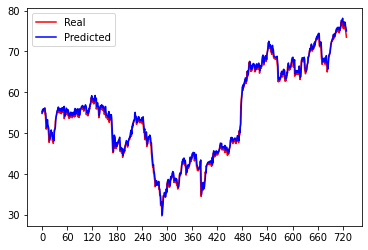

(730, 60, 1)
Time series: 204


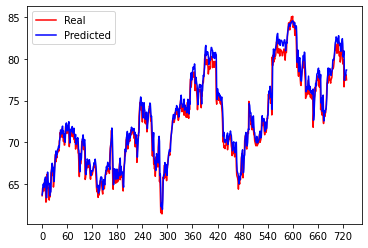

(730, 60, 1)
Time series: 205


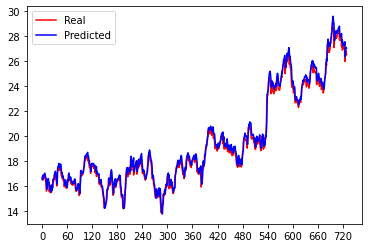

(730, 60, 1)
Time series: 206


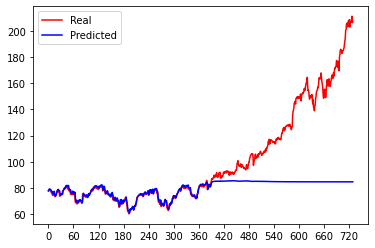

(730, 60, 1)
Time series: 207


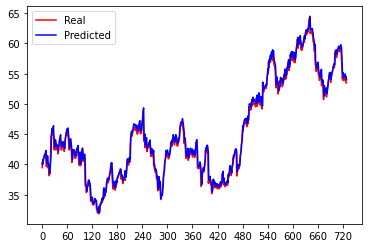

(730, 60, 1)
Time series: 208


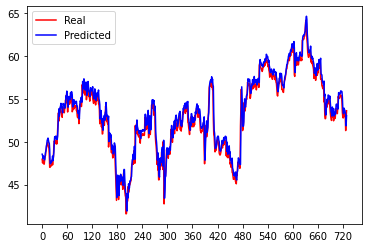

(730, 60, 1)
Time series: 209


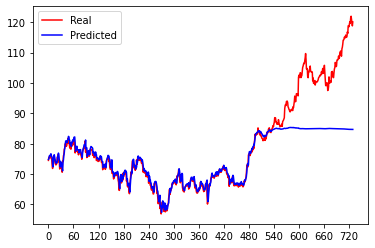

(730, 60, 1)
Time series: 210


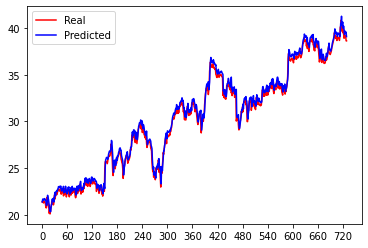

(730, 60, 1)
Time series: 211


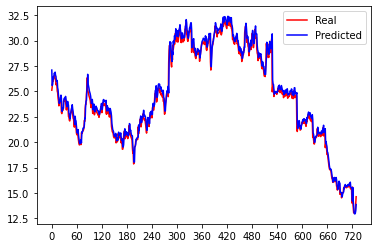

(730, 60, 1)
Time series: 212


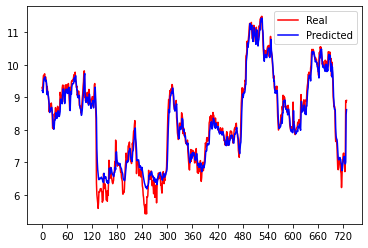

(730, 60, 1)
Time series: 213


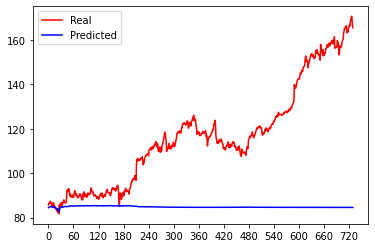

(730, 60, 1)
Time series: 214


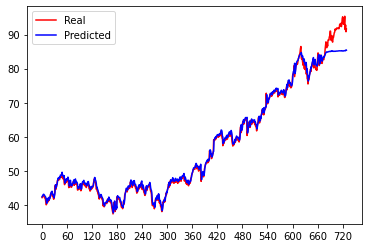

(730, 60, 1)
Time series: 215


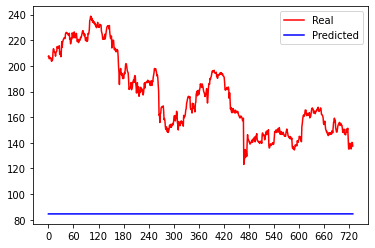

(730, 60, 1)
Time series: 216


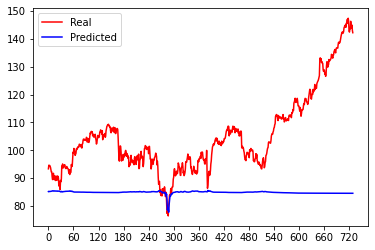

(730, 60, 1)
Time series: 217


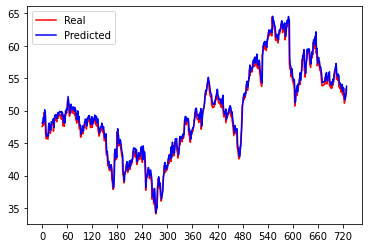

(730, 60, 1)
Time series: 218


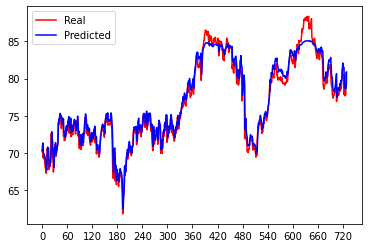

(730, 60, 1)
Time series: 219


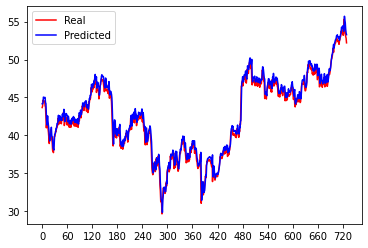

(730, 60, 1)
Time series: 220


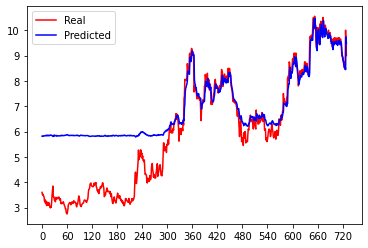

(730, 60, 1)
Time series: 221


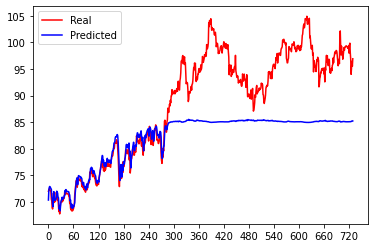

(730, 60, 1)
Time series: 222


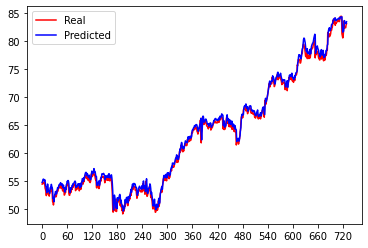

(730, 60, 1)
Time series: 223


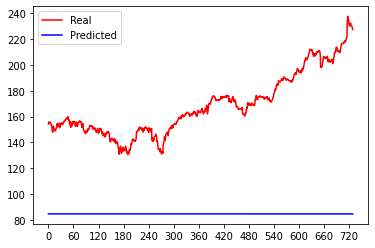

(730, 60, 1)
Time series: 224


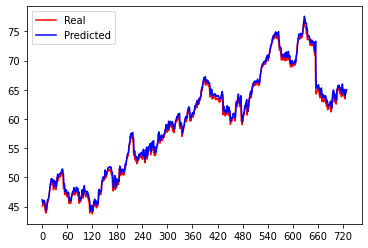

(730, 60, 1)
Time series: 225


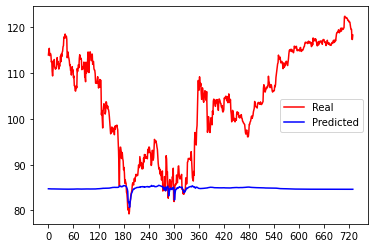

(730, 60, 1)
Time series: 226


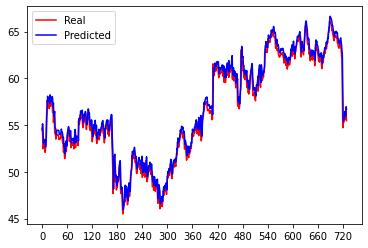

(730, 60, 1)
Time series: 227


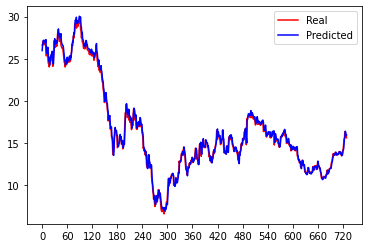

(730, 60, 1)
Time series: 228


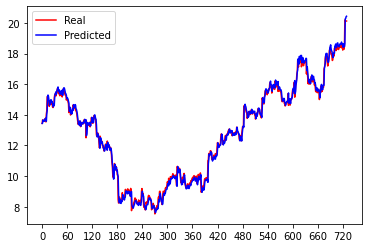

(730, 60, 1)
Time series: 229


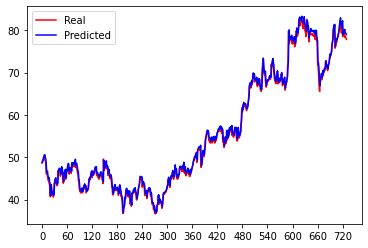

(730, 60, 1)
Time series: 230


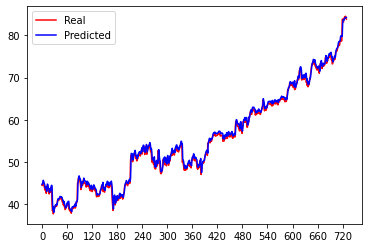

(730, 60, 1)
Time series: 231


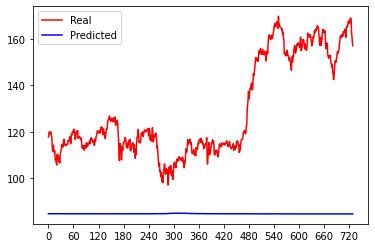

(730, 60, 1)
Time series: 232


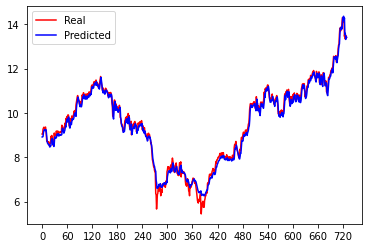

(730, 60, 1)
Time series: 233


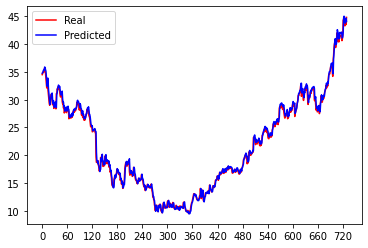

(730, 60, 1)
Time series: 234


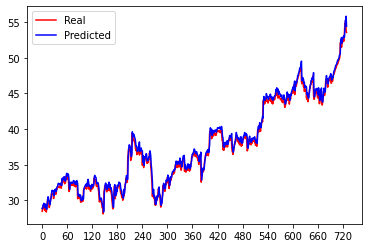

(730, 60, 1)
Time series: 235


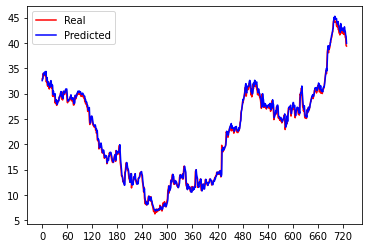

(730, 60, 1)
Time series: 236


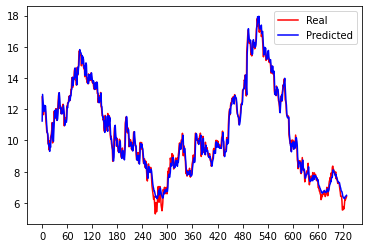

(730, 60, 1)
Time series: 237


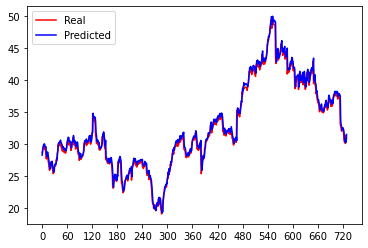

(730, 60, 1)
Time series: 238


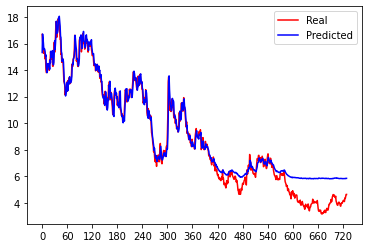

(730, 60, 1)
Time series: 239


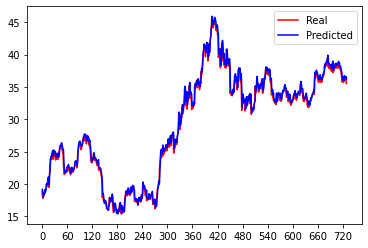

(730, 60, 1)
Time series: 240


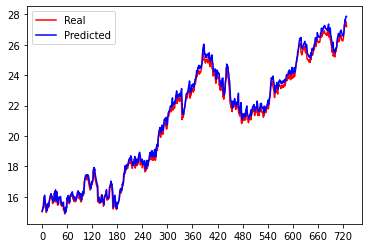

(730, 60, 1)
Time series: 241


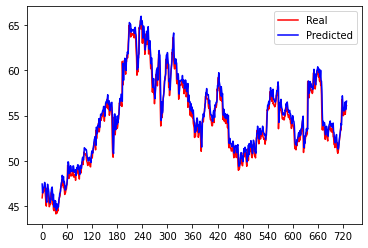

(730, 60, 1)
Time series: 242


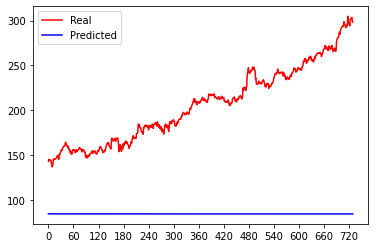

(730, 60, 1)
Time series: 243


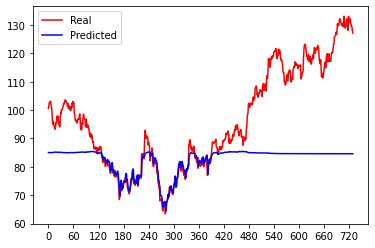

(730, 60, 1)
Time series: 244


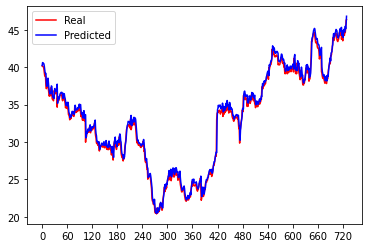

(730, 60, 1)
Time series: 245


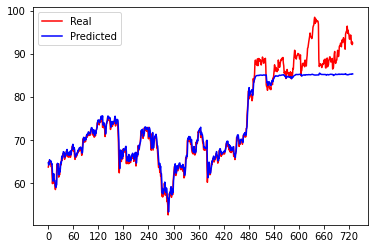

(730, 60, 1)
Time series: 246


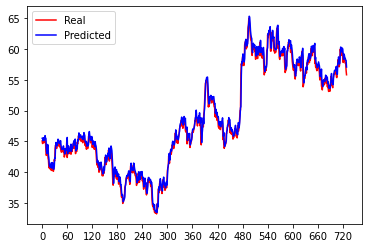

(730, 60, 1)
Time series: 247


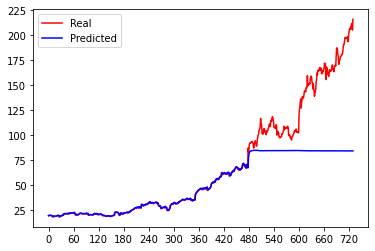

(730, 60, 1)
Time series: 248


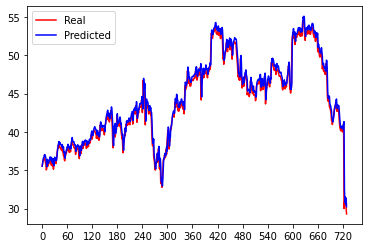

(730, 60, 1)
Time series: 249


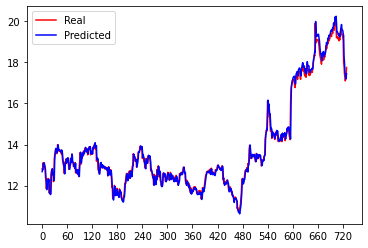

(730, 60, 1)
Time series: 250


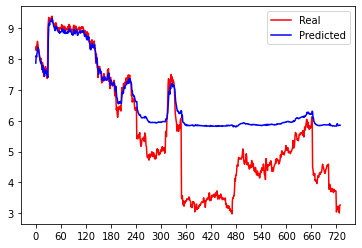

(730, 60, 1)
Time series: 251


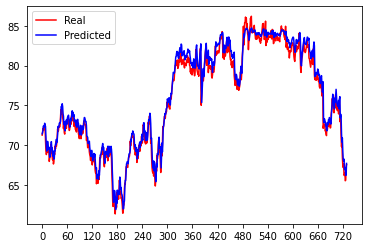

(730, 60, 1)
Time series: 252


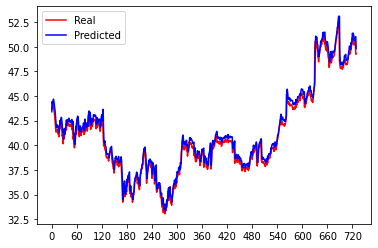

(730, 60, 1)
Time series: 253


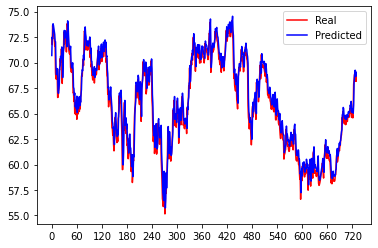

(730, 60, 1)
Time series: 254


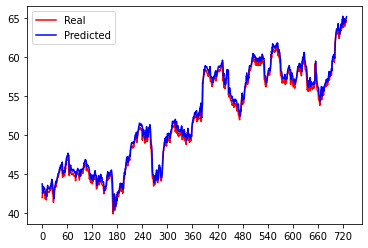

(730, 60, 1)
Time series: 255


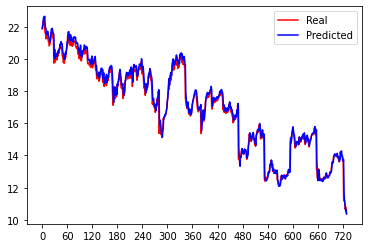

(730, 60, 1)
Time series: 256


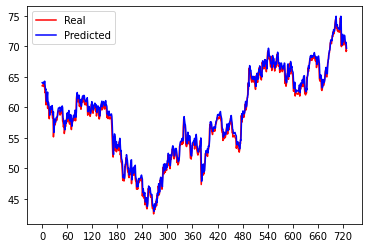

(730, 60, 1)
Time series: 257


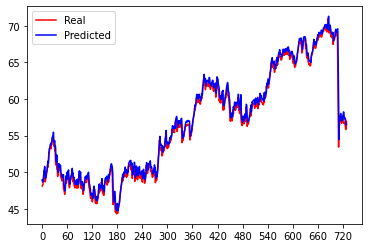

(730, 60, 1)
Time series: 258


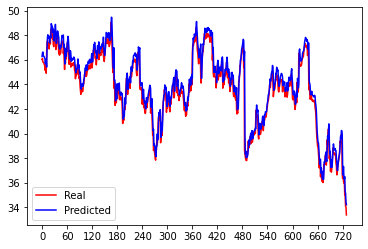

(730, 60, 1)
Time series: 259


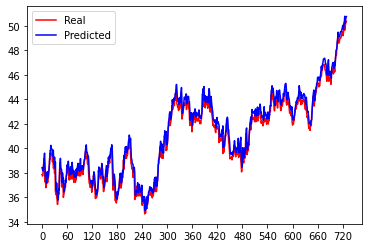

(730, 60, 1)
Time series: 260


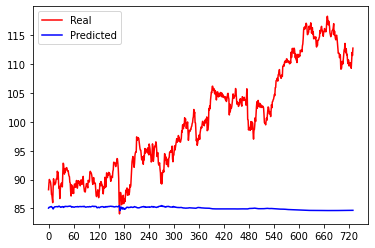

(730, 60, 1)
Time series: 261


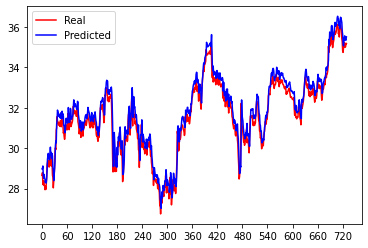

(730, 60, 1)
Time series: 262


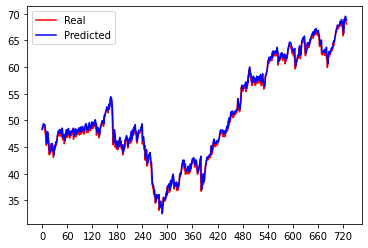

(730, 60, 1)
Time series: 263


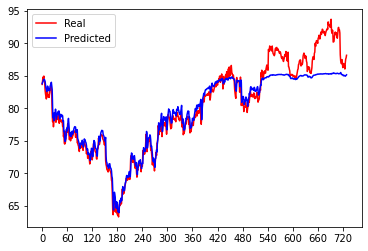

(730, 60, 1)
Time series: 264


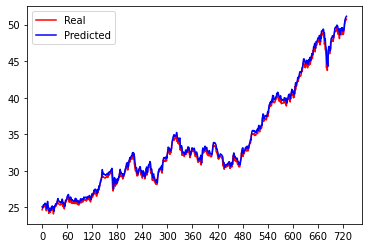

(730, 60, 1)
Time series: 265


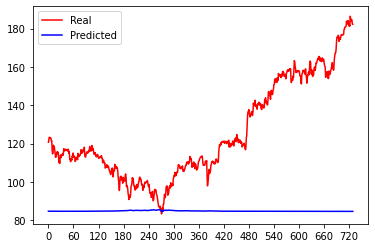

(730, 60, 1)
Time series: 266


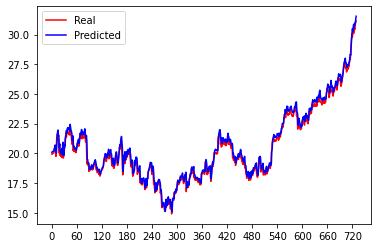

(730, 60, 1)
Time series: 267


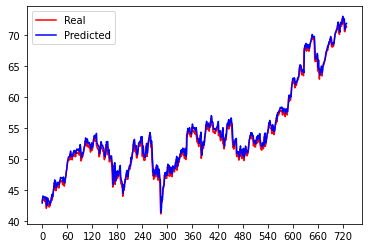

(730, 60, 1)
Time series: 268


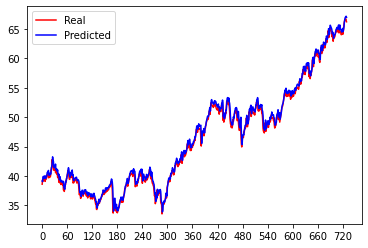

(730, 60, 1)
Time series: 269


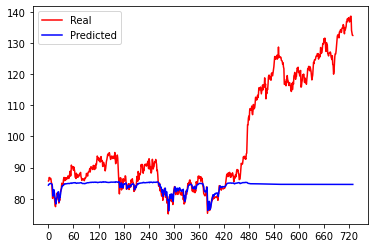

(730, 60, 1)
Time series: 270


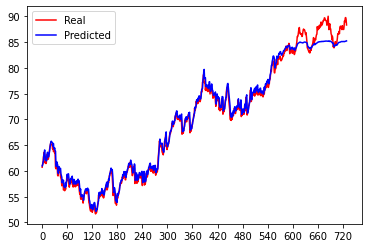

(730, 60, 1)
Time series: 271


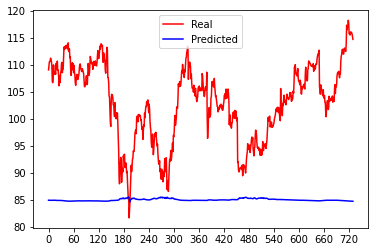

(730, 60, 1)
Time series: 272


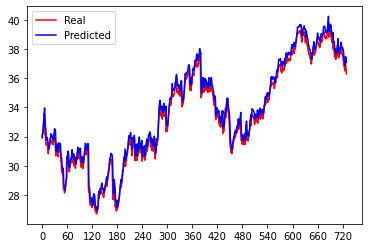

(730, 60, 1)
Time series: 273


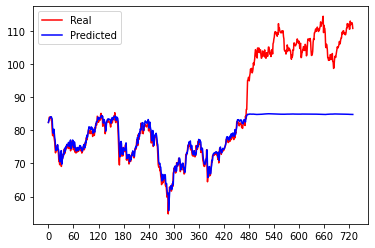

(730, 60, 1)
Time series: 274


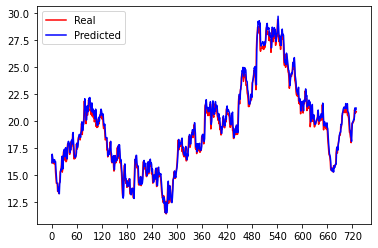

(730, 60, 1)
Time series: 275


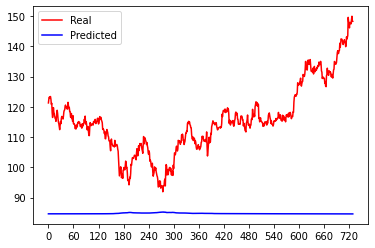

(730, 60, 1)
Time series: 276


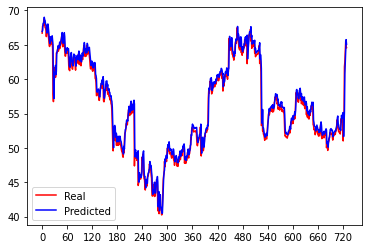

(730, 60, 1)
Time series: 277


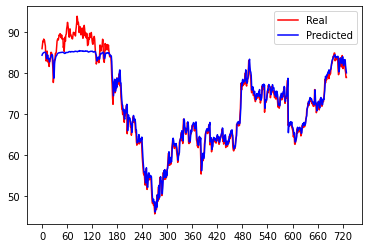

(730, 60, 1)
Time series: 278


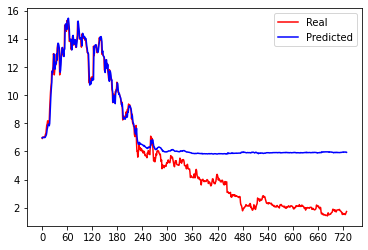

(730, 60, 1)
Time series: 279


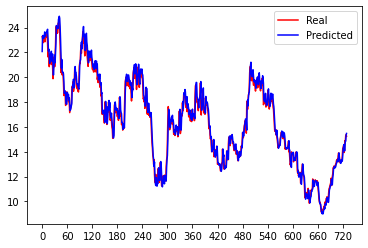

(730, 60, 1)
Time series: 280


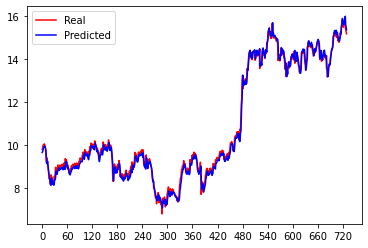

(730, 60, 1)
Time series: 281


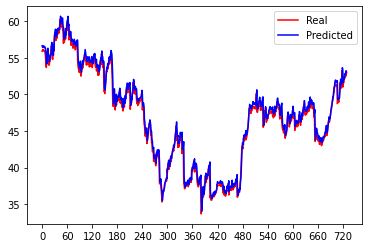

(730, 60, 1)
Time series: 282


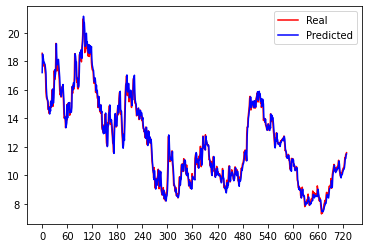

(730, 60, 1)
Time series: 283


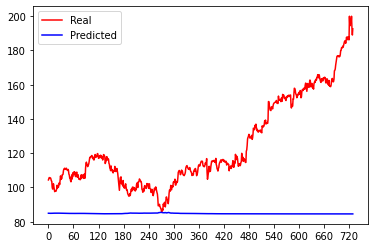

(730, 60, 1)
Time series: 284


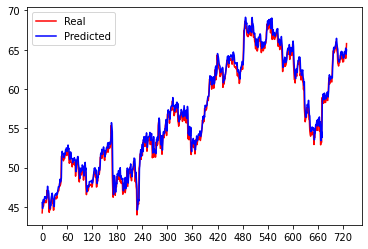

(730, 60, 1)
Time series: 285


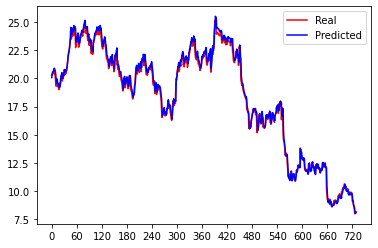

(730, 60, 1)
Time series: 286


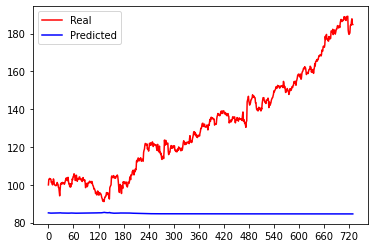

(730, 60, 1)
Time series: 287


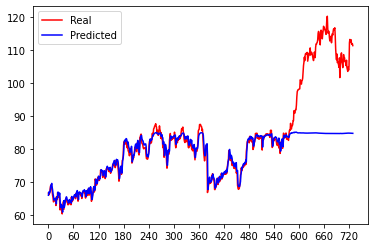

(730, 60, 1)
Time series: 288


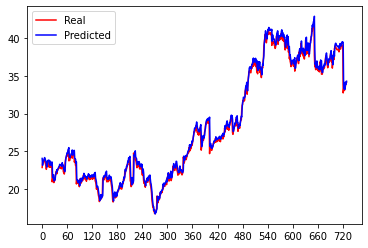

(730, 60, 1)
Time series: 289


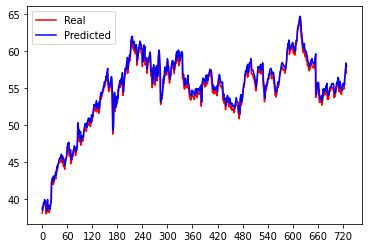

(730, 60, 1)
Time series: 290


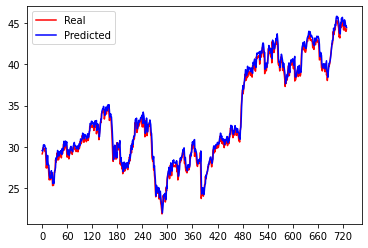

(730, 60, 1)
Time series: 291


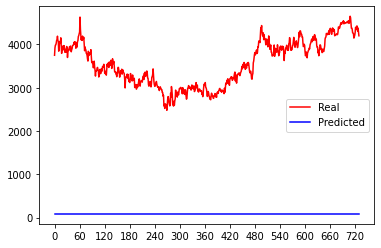

(730, 60, 1)
Time series: 292


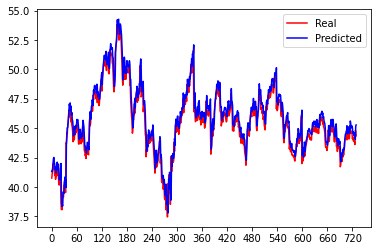

(730, 60, 1)
Time series: 293


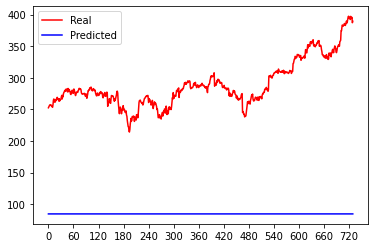

(730, 60, 1)
Time series: 294


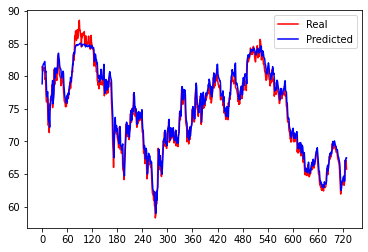

(730, 60, 1)
Time series: 295


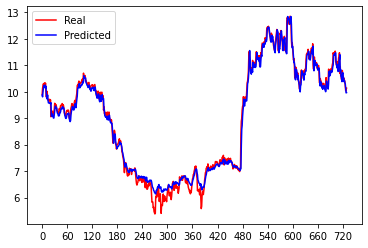

(730, 60, 1)
Time series: 296


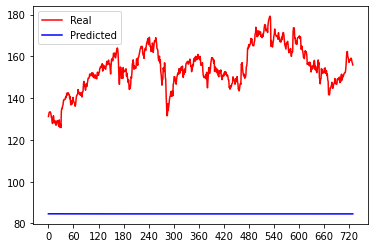

(730, 60, 1)
Time series: 297


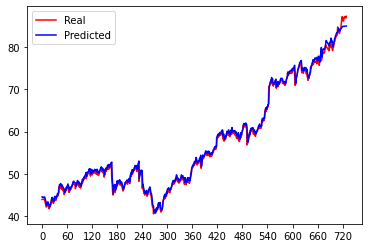

(730, 60, 1)
Time series: 298


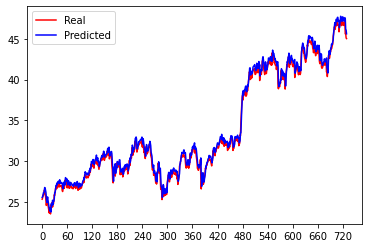

(730, 60, 1)
Time series: 299


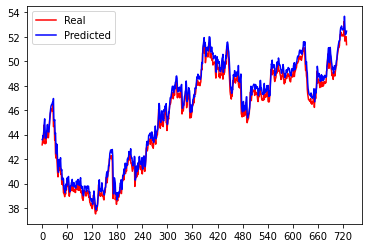

(730, 60, 1)
Time series: 300


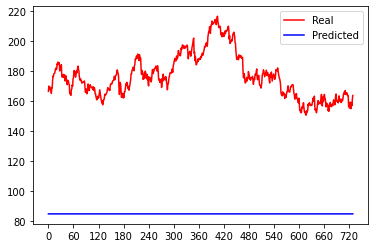

(730, 60, 1)
Time series: 301


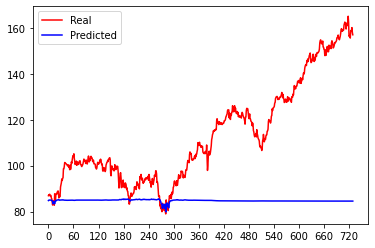

(730, 60, 1)
Time series: 302


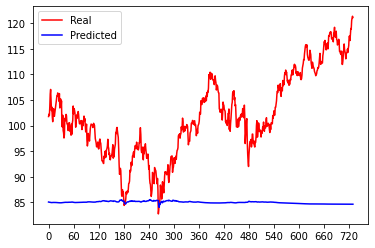

(730, 60, 1)
Time series: 303


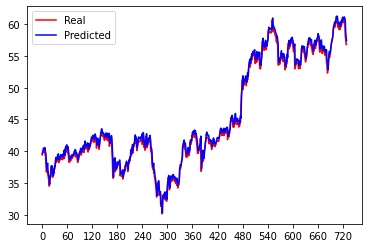

(730, 60, 1)
Time series: 304


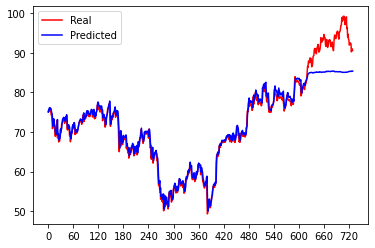

(730, 60, 1)
Time series: 305


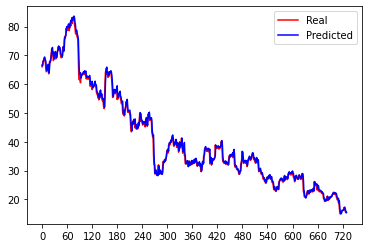

(730, 60, 1)
Time series: 306


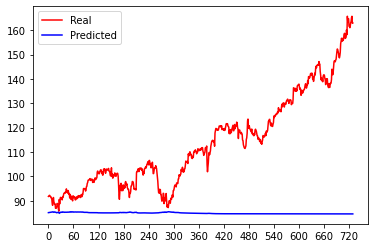

(730, 60, 1)
Time series: 307


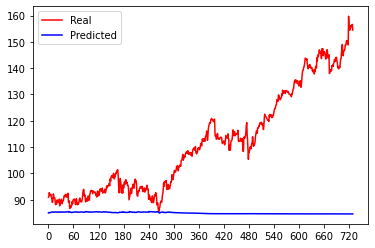

(730, 60, 1)
Time series: 308


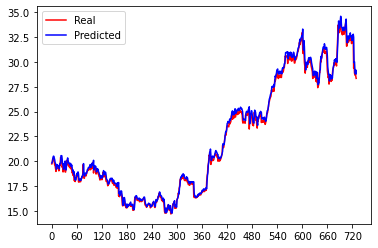

(730, 60, 1)
Time series: 309


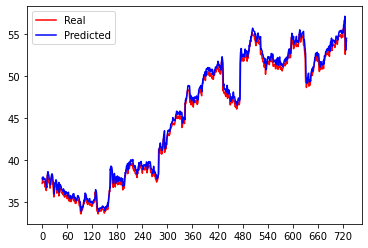

(730, 60, 1)
Time series: 310


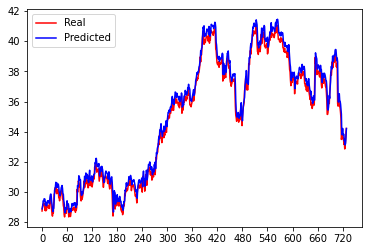

(730, 60, 1)
Time series: 311


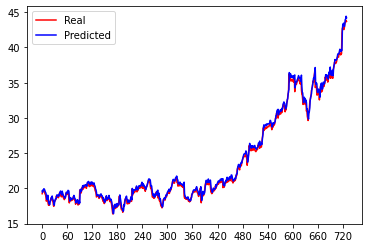

(730, 60, 1)
Time series: 312


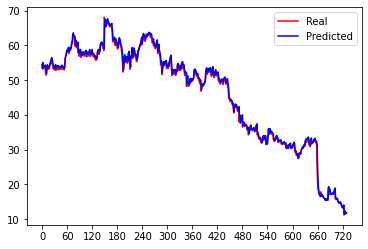

(730, 60, 1)
Time series: 313


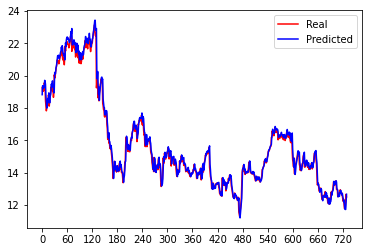

(730, 60, 1)
Time series: 314


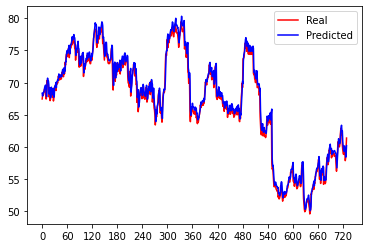

(730, 60, 1)
Time series: 315


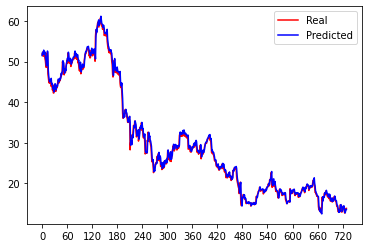

(730, 60, 1)
Time series: 316


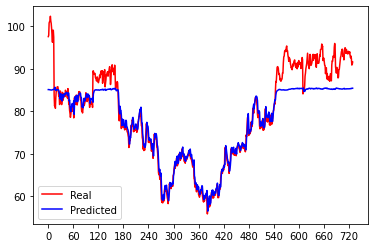

(730, 60, 1)
Time series: 317


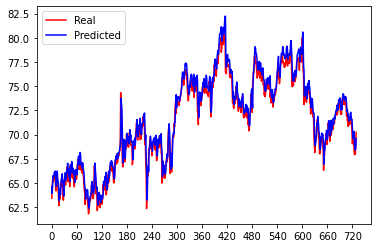

(730, 60, 1)
Time series: 318


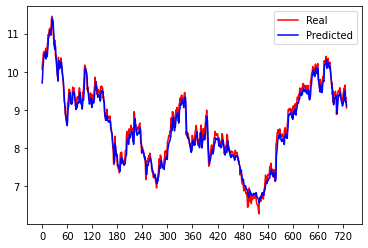

(730, 60, 1)
Time series: 319


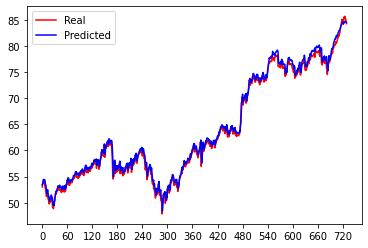

(730, 60, 1)
Time series: 320


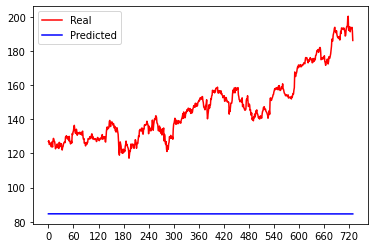

(730, 60, 1)
Time series: 321


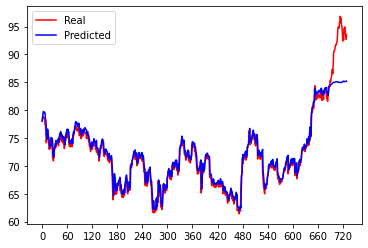

(730, 60, 1)
Time series: 322


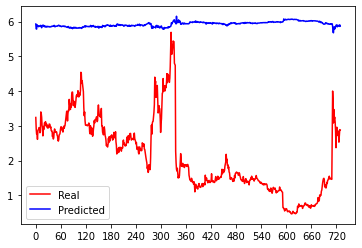

(730, 60, 1)
Time series: 323


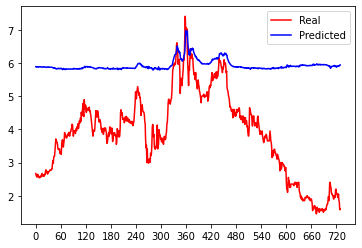

(730, 60, 1)
Time series: 324


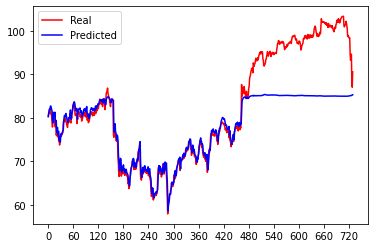

(730, 60, 1)
Time series: 325


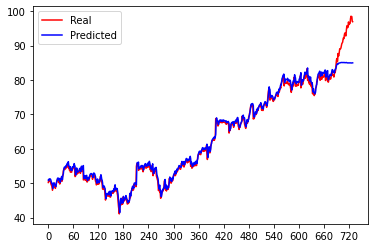

(730, 60, 1)
Time series: 326


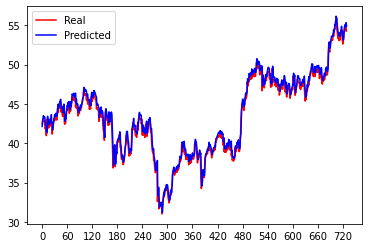

(730, 60, 1)
Time series: 327


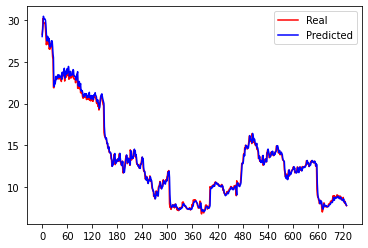

(730, 60, 1)
Time series: 328


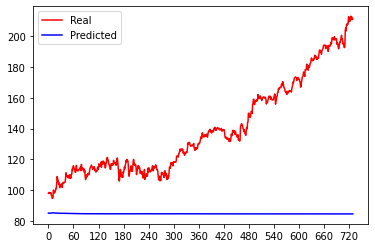

(730, 60, 1)
Time series: 329


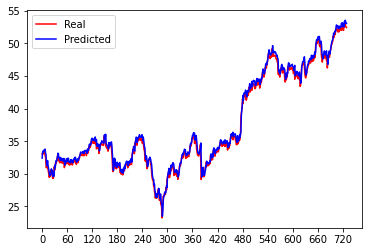

(730, 60, 1)
Time series: 330


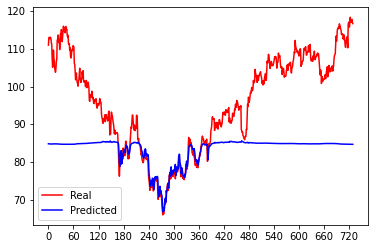

(730, 60, 1)
Time series: 331


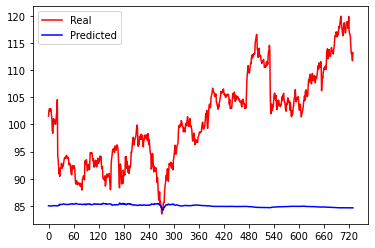

(730, 60, 1)
Time series: 332


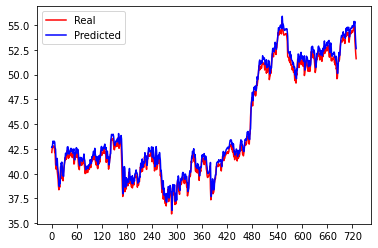

(730, 60, 1)
Time series: 333


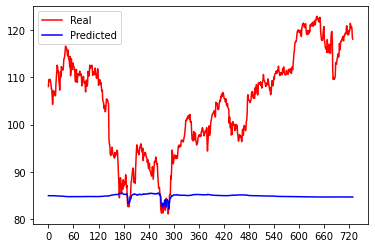

(730, 60, 1)
Time series: 334


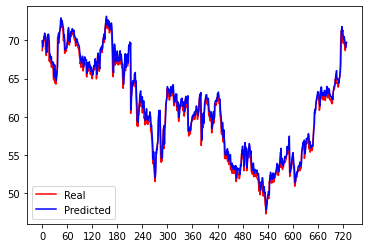

(730, 60, 1)
Time series: 335


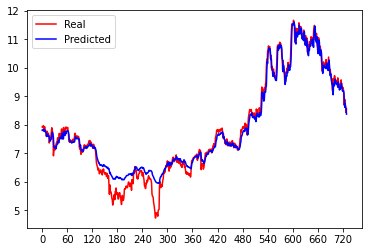

(730, 60, 1)
Time series: 336


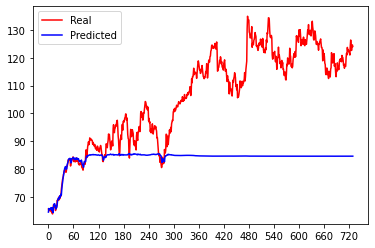

(730, 60, 1)
Time series: 337


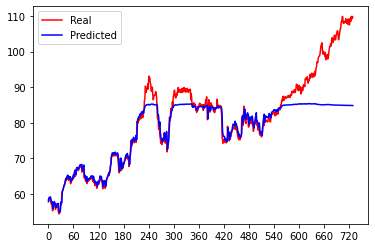

(730, 60, 1)
Time series: 338


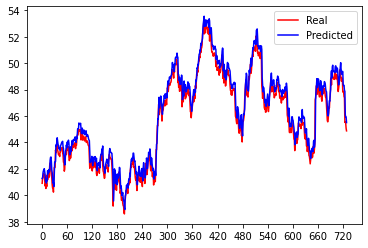

(730, 60, 1)
Time series: 339


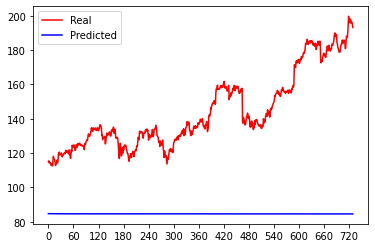

(730, 60, 1)
Time series: 340


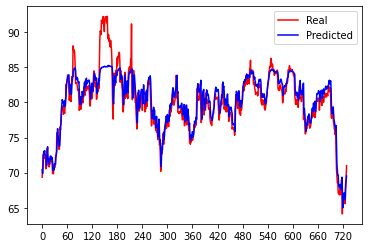

(730, 60, 1)
Time series: 341


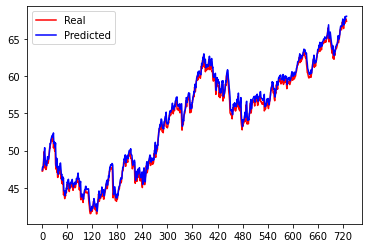

(730, 60, 1)
Time series: 342


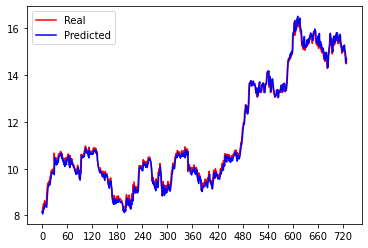

(730, 60, 1)
Time series: 343


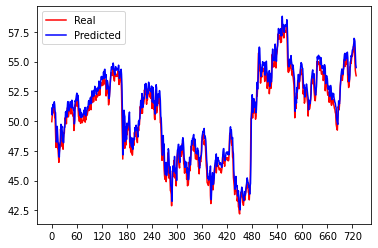

(730, 60, 1)
Time series: 344


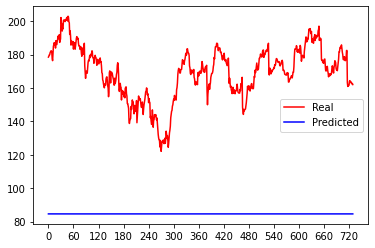

(730, 60, 1)
Time series: 345


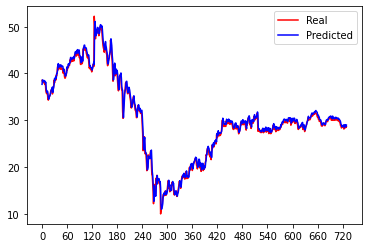

(730, 60, 1)
Time series: 346


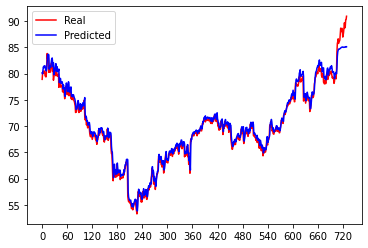

(730, 60, 1)
Time series: 347


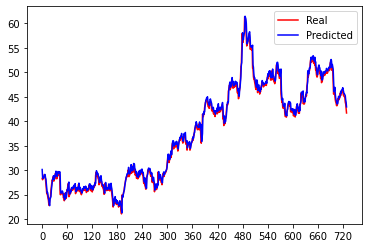

(730, 60, 1)
Time series: 348


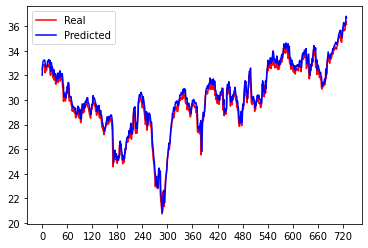

(730, 60, 1)
Time series: 349


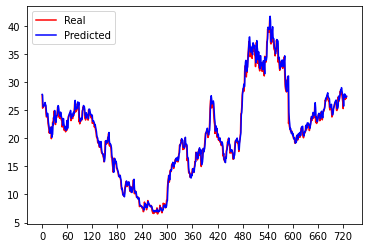

(730, 60, 1)
Time series: 350


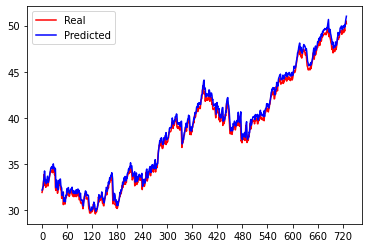

(730, 60, 1)
Time series: 351


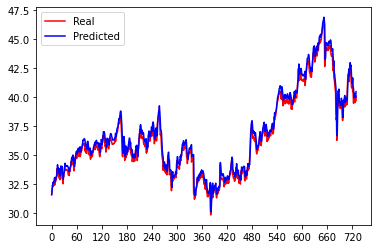

(730, 60, 1)
Time series: 352


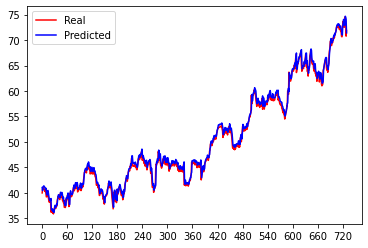

(730, 60, 1)
Time series: 353


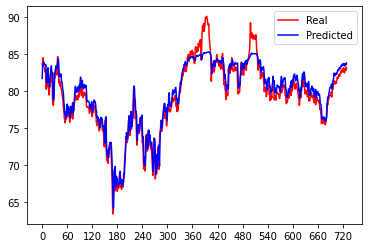

(730, 60, 1)
Time series: 354


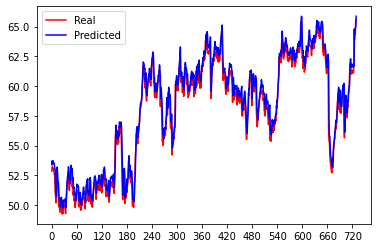

(730, 60, 1)
Time series: 355


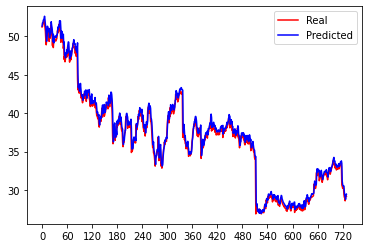

(730, 60, 1)
Time series: 356


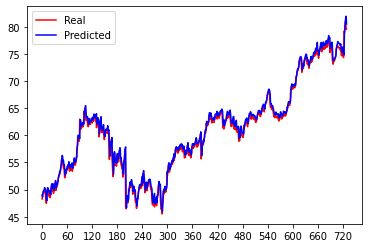

(730, 60, 1)
Time series: 357


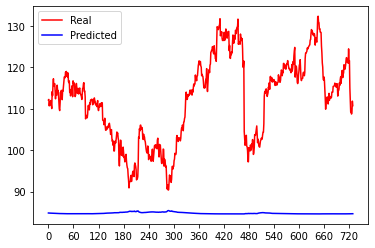

(730, 60, 1)
Time series: 358


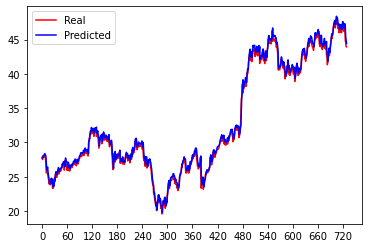

In [8]:
for j in range(0, len(df.columns)):
    
    dataset_train = df.iloc[:train_size, j:j+1]
    dataset_test = df.iloc[train_size:, j:j+1]
    dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)

    inputs = dataset_total[len(dataset_total) - len(dataset_test) - Time_step:].values
    inputs = inputs.reshape(-1,1)
    inputs = sc.transform(inputs)

    X_test = []
    for i in range(Time_step, test_size + Time_step):
        X_test.append(inputs[i-Time_step:i, 0])
    X_test = np.array(X_test)
    X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

    print(X_test.shape)
    
    predicted_stock_price = model.predict(X_test)
    predicted_stock_price = sc.inverse_transform(predicted_stock_price)
    
    print("Time series:", j)
    plt.plot(dataset_test.values, color = 'red', label = 'Real')
    plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted')
    plt.xticks(np.arange(0,test_size,Time_step))
    plt.legend()
    plt.show()